In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-airline-sentiment/database.sqlite
/kaggle/input/twitter-airline-sentiment/Tweets.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn import metrics
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from gensim.models import word2vec

Using TensorFlow backend.


In [3]:
tweets = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')

In [4]:
train=tweets.loc[:,["airline_sentiment","text"]]
train_k=tweets.loc[:,["airline_sentiment","text"]]

['neutral', 'positive', 'negative']


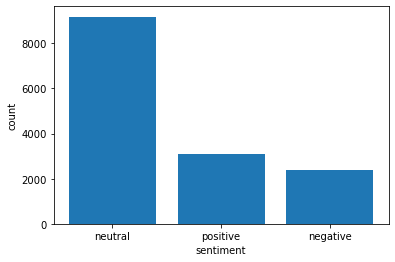

In [5]:
x_axis= list((set(train["airline_sentiment"])))
print(x_axis)
y_axis = train.groupby("airline_sentiment").count()
plt.bar(x_axis,y_axis["text"])
plt.ylabel("count")
plt.xlabel("sentiment")
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder() 
y= le.fit_transform(train['airline_sentiment']) 
from keras.utils import to_categorical
Y = to_categorical(y)

In [7]:
print(Y.shape)
print(Y)


(14640, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [8]:
for i in range(0,len(train["text"])):
   # sentences = sent_tokenize(train["text"][i])
    words = word_tokenize(train["text"][i])
    words = [word for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    porter = PorterStemmer()
    stemmed_words= [ porter.stem(word) for word in words]
    print(stemmed_words)
    train["text"][i]=stemmed_words

['virginamerica', 'what', 'dhepburn', 'said']
['virginamerica', 'plu', 'ad', 'commerci', 'experi', 'tacki']
['virginamerica', 'I', 'today', 'must', 'mean', 'I', 'need', 'take', 'anoth', 'trip']
['virginamerica', 'realli', 'aggress', 'blast', 'obnoxi', 'entertain', 'guest', 'face', 'amp', 'littl', 'recours']
['virginamerica', 'realli', 'big', 'bad', 'thing']
['virginamerica', 'serious', 'would', 'pay', 'flight', 'seat', 'play', 'realli', 'bad', 'thing', 'fli', 'VA']
['virginamerica', 'ye', 'nearli', 'everi', 'time', 'I', 'fli', 'VX', 'ear', 'worm', 'go', 'away']
['virginamerica', 'realli', 'miss', 'prime', 'opportun', 'men', 'without', 'hat', 'parodi', 'http']
['virginamerica', 'well', 'I', 'now', 'I', 'DO']
['virginamerica', 'amaz', 'arriv', 'hour', 'earli', 'you', 'good']
['virginamerica', 'know', 'suicid', 'second', 'lead', 'caus', 'death', 'among', 'teen']
['virginamerica', 'I', 'lt', 'pretti', 'graphic', 'much', 'better', 'minim', 'iconographi', 'D']
['virginamerica', 'thi', 'great

['virginamerica', 'check', 'new', 'music', 'http']
['virginamerica', 'direct', 'flight', 'gt', 'sfo', 'unexpect', 'layov', 'vega', 'fuel', 'yet', 'peep', 'next', 'bought', 'vega', 'flight', 'sneaki']
['virginamerica', 'late', 'flight', 'bag', 'check', 'lost', 'busi', 'I', 'miss', 'flight', 'AM', 'apt', 'three', 'peopl', 'flight', 'exp']
['virginamerica', 'amaz', 'custom', 'servic', 'raeann', 'SF', 'best', 'customerservic', 'virginamerica', 'fli']
['virginamerica', 'call', 'servic', 'line', 'hung', 'thi', 'awesom', 'sarcasm']
['virginamerica', 'site', 'trip', 'I', 'tri', 'check', 'I', 'get', 'plain', 'text', 'version', 'I', 'reluct', 'enter', 'card', 'info']
['virginamerica', 'I', 'schedul', 'sfo', 'dal', 'flight', 'today', 'chang', 'due', 'weather', 'look', 'like', 'flight', 'still']
['virginamerica', 'getaway', 'deal', 'may', 'lot', 'cool', 'citi', 'http', 'cheapflight', 'farecompar']
['virginamerica', 'getaway', 'deal', 'may', 'lot', 'cool', 'citi', 'http', 'cheapflight', 'farecompar

['virginamerica', 'thank', 'much']
['virginamerica', 'tri', 'reset', 'password', 'email', 'never', 'arriv', 'help']
['virginamerica', 'airlin', 'base', 'silicon', 'valley', 'disrupt', 'fcmostinnov', 'incub', 'fastcompani', 'http']
['virginamerica', 'veri', 'nice', 'done']
['virginamerica', 'I', 'look', 'forward', 'watch', 'oscar', 'flight', 'home', 'tomorrow', 'I', 'might', 'even', 'get', 'someth', 'bubbl', 'drink']
['virginamerica', 'what', 'reason', 'delay', 'departur', 'VX', 'jfk', 'afternoon']
['virginamerica', 'today', 'flight', 'palm', 'spring', 'Ca', 'jfk', 'NY', 'cancel', 'flightl']
['virginamerica', 'hahaha', 'virginamerica', 'you', 'guy', 'are', 'amaz', 'I', 'love', 'you', 'guy']
['virginamerica', 'sound', 'like', 'fun']
['virginamerica', 'updat', 'flight', 'jfk', 'gt', 'lax']
['virginamerica', 'spruce', 'moos']
['virginamerica', 'css', 'site', 'right', 'pleas', 'fix', 'site', 'unus']
['virginamerica', 'We', 'flight', 'vega', 'boston', 'today', 'check', 'onlin', 'bag', 'count

['bruh', 'virginamerica', 'giannile', 'turn', 'vxsafetyd']
['virginamerica', 'cours', 'I', 'work', 'virginatlant', 'I', 'obsess', 'entir', 'virgin', 'famili']
['virginamerica', 'ok', 'first', 'time', 'fli', 'tonight']
['virginamerica', 'dig', 'swanki', 'pink', 'mood', 'light', 'flight', 'nyc', 'sfo', 'just', 'need', 'cabaret', 'singer', 'think']
['virginamerica', 'done', 'I', 'need', 'receipt', 'asap', 'could', 'pleas', 'help']
['virginamerica', 'I', 'emboss', 'badg', 'patch', 'superior', 'one', 'current', 'use', 'http']
['virginamerica', 'jfk', 'LA', 'dirti', 'plane', 'standard']
['virginamerica', 'flight', 'head', 'LA', 'jfk', 'dirtiest', 'VA', 'plane', 'I', 'ever', 'sad', 'great', 'airlin']
['virginamerica', 'got', 'squar', 'away', 'someon', 'pick', 'soon', 'I', 'tweet', 'should', 'tweet', 'sooner']
['virginamerica', 'avi', 'rental', 'continu', 'button', 'work', 'websit', 'book', 'car', 'tri', 'time', 'phone', 'thi', 'suck']
['virginamerica', 'delay']
['virginamerica', 'current', 'm

['virginamerica', 'guy', 'perfect', 'alway', 'lt', 'wervirgin']
['virginamerica', 'thank', 'best', 'custom', 'servic', 'left', 'industri']
['virginamerica', 'can', 'give', 'silver', 'statu', 'month']
['virginamerica', 'realli', 'wish', 'fli', 'fargo', 'fargoairport', 'fare', 'amaz']
['virginamerica', 'mood', 'light', 'reclin', 'seat', 'kickin']
['virginamerica', 'flight', 'schedul', 'departur', 'still', 'say', 'time', 'plane', 'gate', 'ani', 'updat', 'long', 'delay']
['virginamerica', 'group', 'got', 'cancel', 'flightlat', 'fee', 'waiv', 'I', 'ca', 'ticket', 'book', 'your', 'rep', 'help', 'either']
['virginamerica', 'are', 'sign', 'bonus', 'enrol', 'elev']
['virginamerica', 'got', 'newark', 'home', 'LA', 'your', 'folk', 'ewr', 'incred', 'letsgohom']
['virginamerica', 'morn', 'If', 'I', 'question', 'regard', 'elev', 'point', 'amp', 'flight', 'I', 'DM']
['virginamerica', 'still', 'wait', 'see']
['virginamerica', 'wonder', 'guy', 'reciev', 'dm', 'abl', 'potenti', 'respond', 'asap']
['virg

['unit', 'email', 'address', 'I', 'reach', 'too', 'long', 'DM']
['unit', 'disappoint', 'u', 'didnt', 'honor', 'credit', 'given', 'ur', 'mistak', 'take', 'busi', 'elsewher']
['unit', 'still', 'wait', 'suppos', 'depart']
['unit', 'credit', 'last', 'trip', 'never', 'came', 'mail']
['unit', 'ok', 'month', 'wait', 'hear', 'airlin', 'I', 'gave', 'quit', 'bit', 'day', 'request', 'terribl', 'servic']
['unit', 'process', 'ever', 'end', 'still', 'wait', 'repli', 'sinc', 'month', 'pathet', 'customerservic']
['unit', 'what', 'go', 'websit', 'I', 'flight', 'book', 'problem', 'three', 'ticket', 'today', 'I', 'boot', 'system', 'umpteen', 'time']
['unit', 'I', 'get', 'account', 'number', 'websit', 'say', 'email', 'unavail']
['unit', 'So', 'I', 'need', 'book', 'two', 'one', 'way', 'order', 'fli', 'unaccompani', 'minor']
['unit', 'I', 'receiv', 'bag', 'last', 'night', 'I', 'still', 'miss', 'one']
['unit', 'simonroesn', 'need', 'upgrad', 'seat', 'even', 'economi', 'plu', 'like', 'sit', 'concret', 'bench'

['unit', 'the', 'agent', 'met', 'us', 'gate', 'said', 'issu', 'would', 'taken', 'onlin']
['unit', 'I', 'send', 'urgent', 'messag', 'via', 'eservic', 'narayanan', 'pleas', 'respond', 'asap', 'also', 'NO', 'local', 'unit', 'tel', 'kul']
['unit', 'thank', 'will', 'guy', 'get', 'anytim', 'soon']
['unit', 'but', 'ladi', 'one', 'phone', 'say', 'tel', 'aviv', 'tel', 'aviv', 'unit', 'say', 'newark', 'No', 'one', 'know', 'I', 'noth']
['unit', 'melaniespr', 'We', 'see', 'We', 'run', 'most', 'plane', 'run', 'thank', 'help']
['unit', 'ye', 'still', 'answer', 'mani', 'luggag', 'day', 'unaccept']
['unit', 'go', 'noth', 'like', 'alway']
['unit', 'I', 'sent', 'feedback', 'thank']
['unit', 'plu', 'food', 'and', 'taxi']
['unit', 'offer', 'us', 'room', 'peopl', 'fail']
['unit', 'peopl', 'get', 'pretti', 'tire', 'action', 'solv', 'problem', 'plu', 'miss', 'day', 'vacat', 'ski']
['unit', 'the', 'bright', 'side', 'would', 'keep', 'promis', 'made', 'hope', 'good', 'night', 'thank']
['unit', 'ye', 'I']
['unit

['unit', 'My', 'mom', 'left', 'kindl', 'flight', 'today', 'burgundi', 'case', 'light', 'seat', 'did', 'anyon', 'find']
['unit', 'ticket', 'pleas', 'refund', 'unnecessari', 'upgrad', 'fee']
['unit', 'horribl', 'they', 'lost', 'carseat', 'expect', 'us', 'use', 'loner', 'carseat', 'safeti', 'regul', 'say', 'illeg', 'use', 'use', 'car', 'seat']
['unit', 'thank']
['decis', 'decis', 'mandarinjourney', 'unit', 'We', 'love', 'tri', 'servic', 'We', 'offer', 'statu', 'match', 'http']
['need', 'info', 'unit', 'momsgoodeat', 'We', 'great', 'amen', 'kit', 'PJ', 'includ', 'We', 'statu', 'match', 'AA']
['unit', 'I', 'care', 'thehipmunk', 'link', 'show', 'wrong', 'price', 'site', 'amp', 'respons', 'ensur', 'correct']
['unit', 'Do', 'flight', 'lie', 'flat', 'seat', 'stl', 'pdx', 'around', 'date', 'march']
['unit', 'He', 'need', 'get', 'home', 'tell', 'night', 'Is', 'compens', 'anyth', 'done']
['unit', 'mllovelac', 'the', 'baggag', 'fee', 'waiv', 'premier', 'member', 'pleas', 'see', 'http', 'point', 'me

['unit', 'I', 'say', 'I', 'made', 'flight', 'unaccount', 'lost', 'time', 'amp', 'lot', 'frustrat', 'flyer', 'stand', 'around']
['unit', 'I', 'think', 'DM', 'would', 'better']
['unit', 'gate', 'announc', 'state', 'delay', 'due', 'mainten', 'yet', 'app', 'say', 'late', 'flight', 'arriv', 'aircraft', 'tell', 'truth', 'unfriendli']
['unit', 'easili', 'worst', 'compani', 'I', 'ever', 'experienc', 'you', 'lost', 'someon', 'person', 'possess', 'amp', 'could', 'care', 'less']
['unit', 'app', 'show', 'arriv', 'aircraft', 'earli', 'depart', 'flight', 'delay', 'due', 'late', 'flight', 'arriv', 'aircraft', 'unfriendli']
['unit', 'alreadi', 'airport', 'hr', 'late', 'flightr', 'still', 'guy', 'realli', 'kill', 'today', 'tri', 'stay']
['unit', 'unit', 'servic', 'level', 'reach', 'etihad', 'let', 'realist', 'lufthansa', 'ill', 'consid']
['unit', 'realli', 'someon', 'call', 'sick', 'someon', 'forgot', 'call', 'replac', 'now', 'hour', 'late', 'flight', 'take', 'theworst']
['unit', 'ask', 'flight', 'atte

['unit', 'great', 'hear', 'thankyou', 'much', 'greatli', 'appreci', 'repli', 'feel', 'much', 'settl']
['unit', 'counter', 'agent', 'rdu', 'deserv', 'medal', 'thankyou']
['the', 'saga', 'melissaafr', 'bag', 'delay', 'unit', 'reunion', 'forc', 'go', 'shop', 'stay', 'tune']
['unit', 'flight', 'gate', 'agent', 'tri', 'prevent', 'take', 'onboard', 'bag', 'I', 'use', 'year', 'flight', 'crew', 'reason']
['unit', 'thank', 'liter', 'call', 'preboard', 'I', 'ran']
['unit', 'guy', 'split', 'charg', 'credit', 'card', 'make', 'unnecessarili', 'expens', 'peopl', 'fli', 'guy', 'pt']
['unit', 'point', 'oversel', 'bad', 'make', 'peopl', 'wait', 'kick', 'board', 'wors']
['unit', 'brilliant', 'thankyou', 'much', 'Is', 'class', 'part', 'carryon']
['unit', 'gate', 'leav']
['unit', 'thank', 'listen', 'compliant', 'right', 'thing', 'I', 'appreci', 'work']
['unit', 'sinc', 'cancel', 'flightl', 'flight', 'twice']
['unit', 'chanc', 'I', 'wait', 'ord', 'afternoon', 'anoth', 'flight', 'screw', 'hold']
['unit', 'w

['unit', 'JH', 'thank', 'much', 'reach', 'I', 'abl', 'get', 'assist', 'wait', 'minut']
['unit', 'stand', 'still', 'No', 'pilot', 'paperwork', 'fix', 'problem', 'fix', 'ago', 'flight', 'delay']
['unit', 'pleas', 'see', 'dm']
['unit', 'Is', 'reason', 'wait', 'min', 'bag', 'made', 'check', 'flight', 'staff', 'could', 'polic', 'overhead', 'bin']
['unit', 'pleas', 'msg', 'custom', 'servic', 'I', 'invoic', 'dri', 'clean', 'wo', 'abl', 'take', 'wet', 'cloth', 'airport']
['unit', 'AN', 'hour', 'delay', 'becaus', 'you', 'CA', 'print', 'A', 'piec', 'OF', 'paper']
['unit', 'still', 'respons']
['unit', 'peopl', 'mci', 'del', 'prefer', 'jet', 'airway', 'segment', 'anytim', 'decemb']
['unit', 'abl', 'get', 'seat', 'assign', 'without', 'pay', 'cust', 'sec', 'done']
['unit', 'there', 'refer', 'number', 'your', 'agent', 'told', 'drive', 'airport', 'I', 'ca', 'reach', 'anyon', 'deliv']
['unit', 'slightli', 'better', 'crew', 'spent', 'long', 'time', 'search', 'better', 'altitud', 'would', 'help', 'let', 

['unit', 'cancel', 'flightl', 'delay', 'book', 'problem', 'still', 'mile', 'home', 'At', 'least', 'acknowledg', 'cancel', 'flightlat']
['unit', 'never', 'ever', 'I', 'flight', 'book', 'problem', 'flight', 'unit', 'affili', 'chanc', 'get', 'unit', 'flight']
['unit', 'wa', 'abl', 'send', 'DM', 'all', 'good']
['unit', 'three', 'delay', 'flight', 'miss', 'connect', 'first', 'class', 'flight', 'get', 'compens', 'lose', 'seat']
['unit', 'hold', 'hour', 'day', 'sort', 'told', 'fine', 'fine', 'arriv', 'fli']
['unit', 'almost', 'week', 'still', 'word', 'dot', 'updat', 'london', 'fare', 'us', 'citi', 'updat', 'end']
['unit', 'thank', 'got', 'straightend', 'last', 'night']
['unit', 'well', 'start', 'would', 'nice', 'ticket', 'actual', 'system', 'chang', 'flight']
['unit', 'chanc', 'flight', 'delay', 'nervou', 'drive', 'dfw', 'weather', 'drop', 'brother']
['unit', 'anoth', 'aw', 'experi', 'victoria', 'check', 'desk', 'stl', 'could', 'rude', 'condescend']
['unit', 'want', 'deliv', 'hous', 'had', 'g

['unit', 'whi', 'announc', 'roller', 'If', 'I', 'want', 'put', 'coat', 'choic', 'how', 'gate', 'check', 'thx']
['unit', 'earli', 'frontrunn', 'best', 'airlin']
['unit', 'bag', 'left', 'behind', 'plane', 'overweight', 'great', 'knew', 'soon', 'land', 'instead', 'let', 'us', 'wait', 'minut', 'info']
['unit', 'you', 'F', 'amp', 'king', 'joke', 'your', 'custom', 'servic', 'woeful', 'If', 'staff', 'tell', 'passeng', 'someth']
['unit', 'sponsor', 'oscar', 'No', 'wonder', 'half', 'hour', 'delay', 'oscar']
['unit', 'work', 'like', 'charm', 'bag', 'wait', 'carousel', 'got', 'baggag', 'claim', 'welldon', 'goodflight', 'friendlyski']
['unit', 'lose', 'bag', 'wo', 'give', 'free', 'pretzel', 'fraud']
['unit', 'tri', 'charg', 'buck', 'lower', 'award', 'ticket', 'I', 'want', 'get', 'hard', 'earn', 'point', 'back', 'total', 'BS']
['unit', 'asap', 'mean', 'two', 'hour', 'worth', 'delay', 'return', 'termin', 'count', 'luggag', 'third', 'time', 'gottogetbett']
['unit', 'apart', 'hold', 'hour', 'talk', 'p

['unit', 'delay', 'due', 'make', 'We', 'back', 'gate', 'multipl', 'time', 'mayb', 'take', 'account']
['unit', 'whi', 'I', 'give', 'leg', 'room', 'peopl', 'row', 'fill', 'bin', 'pl', 'start', 'charg', 'http']
['unit', 'pleas', 'tell', 'clt', 'flight', 'need', 'gate', 'wait', 'min']
['unit', 'whi', 'load', 'us', 'fli', 'sardin', 'knew', 'pilot', 'hour', 'late', 'flight', 'incompet', 'beyond', 'belief']
['unit', 'book', 'first', 'two', 'let', 'see', 'compar', 'garbag', 'americanair', 'first', 'class', 'becom']
['unit', 'seat', 'god', 'aw']
['unit', 'good', 'tri', 'southwestair', 'got', 'safer', 'sooner']
['unit', 'want', 'compliment', 'ur', 'phone', 'agent', 'jeanett', 'reflight', 'book', 'problem', 'rdu', 'sea', 'thru', 'sfo', 'connect', 'flight', 'thru', 'ewr', 'cancel', 'flightl']
['unit', 'hour', 'min', 'delay', 'far', 'would', 'love', 'round', 'hour', 'go', 'bed']
['unit', 'educ', 'bohol', 'c', 'volunt', 'staff', 'I', 'help', 'kid', 'buy', 'plane', 'ticket', 'I', 'ca', 'can', 'help']

['unit', 'make', 'sure', 'take', 'care', 'lsusoftbal', 'team', 'amp', 'lsuquinlanduhon', 'team', 'We']
['unit', 'delay', 'hr', 'flight', 'final', 'board', 'plane', 'sit', 'half', 'hour', 'amp', 'crew', 'hr', 'limit', 'amp', 'deplan', 'unaccept']
['unit', 'stuck', 'yyz', 'staff', 'took', 'break', 'not', 'happi']
['unit', 'person', 'devic', 'entertain', 'system', 'great', 'app', 'crash', 'everi', 'min', 'I', 'glad', 'free']
['unit', 'pl', 'stop', 'send', 'text', 'everi', 'say', 'flight', 'delay', 'anoth', 'I', 'usual', 'defend', 'u']
['unit', 'agent', 'you', 'use', 'bathroom', 'toilet', 'onboard', 'full', 'Oh', 'expect', 'strongli', 'word', 'email', 'funit']
['unit', 'hire', 'extra', 'custom', 'servic', 'minut', 'wait', 'time', 'ask', 'one', 'question', 'I', 'would', 'rather', 'fli', 'anoth', 'airlin', 'thank']
['unit', 'unit', 'flight', 'two', 'delay', 'cancel', 'flightl', 'explan', 'amp', 'flight', 'norfolk', 'book', 'rent', 'car']
['unit', 'I', 'tri', 'mileag', 'program', 'histor', 'l

['unit', 'screw', 'flight', 'cae', 'whi', 'bother', 'flight', 'never', 'leav', 'time', 'get', 'cancel', 'flight']
['unit', 'I', 'need', 'agent', 'check']
['unit', 'work', 'incred', 'unfriendli', 'ground', 'staff', 'fals', 'promis', 'twitter', 'theairhelp']
['unit', 'got', 'thank']
['unit', 'the', 'skill', 'staff', 'inadequ', 'system', 'delet', 'return', 'houston', 'norway', 'shoulder', 'shrug']
['unit', 'thi', 'probabl', 'least', 'depend', 'airlin', 'western', 'hemispher', 'unit', 'belong', 'star', 'allianc', 'skyteam']
['unit', 'sever', 'staf', 'iah']
['unit', 'amaz', 'hospit', 'help', 'anthoni', 'lastella', 'great', 'staff', 'def', 'fli', 'unit']
['unit', 'hr', 'delay', 'vacat', 'buzzkil']
['unit', 'touch', 'miami', 'far', 'nice', 'done', 'unit']
['unit', 'statu', 'flight']
['unit', 'realli', 'enjoy', 'sunday', 'hold', 'hour', 'perhap', 'better', 'client', 'experi', 'need', 'http']
['unit', 'Is', 'snowboard', 'boot', 'bag', 'includ', 'standard', 'check', 'baggag', 'next', 'snowboard'

['unit', 'rebook', 'UA', 'cancel', 'flightl', 'I', 'paid', 'first', 'class', 'ticket', 'new', 'seat', 'can', 'pleas', 'fix']
['unit', 'need', 'new', 'flight', 'tucson']
['unit', 'system', 'I', 'troubl', 'check', 'flight', 'depart', 'less', 'hr']
['unit', 'fuck', 'close', 'premier', 'access', 'line', 'ord', 'probabl', 'gon', 'na', 'miss', 'flight', 'start', 'treat', 'custom', 'better']
['unit', 'good', 'luck', 'strategi', 'innov', 'work', 'hello', 'jetblu', 'http']
['unit', 'human', 'contact', 'mth', 'americanair', 'cust', 'relat', 'refund', 'dept', 'If', 'ever', 'problem', 'u', 'human', 'I', 'talk']
['unit', 'would', 'think', 'would', 'clean', 'ramp', 'our', 'jet', 'stuck', 'snow', 'newark', 'thi', 'would', 'never', 'happen', 'delta']
['unit', 'I', 'would', 'understand', 'weather', 'issu', 'bc', 'airlin', 'mainten', 'I', 'sleep', 'airport', 'floor', 'lose', 'entir', 'day']
['unit', 'I', 'thank']
['unit', 'flight', 'delay', 'min', 'bc', 'miss', 'screw', 'danger', 'miss', 'flight']
['uni

['unit', 'hour', 'delay', 'doubl', 'book', 'seat', 'nit', 'park', 'wrong', 'gate', 'incompet', 'finest', 'wait', 'hr']
['unit', 'look', 'peopl', 'tryn', 'sleep', 'airport', 'due', 'shitti', 'compani', 'comp', 'room', 'cxl', 'flight', 'http']
['unit', 'rout', 'person', 'houston', 'newark', 'NJ', 'sfo', 'accept']
['unit', 'phone']
['unit', 'freakin']
['unit', 'pick']
['unit', 'suck']
['unit', 'minut', 'hold', 'hr', 'min']
['unit', 'yr', 'fli', 'exclus', 'I', 'get', 'everyon', 'hate', 'getmeoffrhisfuckinplan']
['unit', 'seat', 'avail', 'pm', 'ord', 'rdu', 'I', 'need', 'seat', 'pleas']
['unit', 'I', 'still', 'tri', 'get', 'thing', 'work', 'yet', 'respond', 'back']
['unit', 'screw', 'assign', 'new', 'one', 'us', 'amp', 'chang', 'flight', 'chang', 'origin']
['unit', 'min', 'hold', 'progress', 'hour']
['unit', 'you', 'suck']
['unit', 'yo', 'need', 'new', 'websit', 'realli', 'badli', 'thi', 'day', 'age']
['unit', 'I', 'rebook', 'I', 'pick', 'luggag']
['unit', 'u', 'gate', 'readi', 'gate', 'age

['unit', 'baggag', 'person', 'told', 'go', 'aircanada', 'handl', 'connect', 'flight']
['unit', 'I', 'sent', 'PM', 'two', 'week', 'ago', 'heard', 'noth', 'horribleservic', 'unitedsuck']
['unit', 'well', 'degre', 'could', 'just', 'know', 'experi', 'I', 'cancel', 'flight', 'mile', 'card', 'thank', 'god', 'delta']
['unit', 'thank', 'excit', 'work', 'guy']
['unit', 'could', 'realli', 'use', 'help', 'get', 'bag', 'iad', 'We', 'head', 'yow', 'go', 'yxu']
['unit', 'It', 'appear', 'six', 'flight', 'calgari', 'tomorrow', 'correct']
['unit', 'and', 'yet', 'still', 'left', 'yet', 'I', 'ca', 'watch', 'directtv', 'firstworldproblem']
['unit', 'yr', 'team', 'hold', 'hour', 'unhelp', 'pl', 'answer', 'question']
['unit', 'let', 'us', 'know', 'find', 'everyon', 'luggag', 'thank', 'unitedairlin']
['unit', 'u', 'serv', 'yr', 'flight', 'yr', 'polici', 'r', 'confus', 'contradictori', 'advic', 'pl', 'help', 'anaphylaxi', 'u', 'ask', 'refrain']
['unit', 'anoth', 'airport', 'closer', 'calgari', 'fli', 'tomorro

['unit', 'flight', 'amaz', 'thi', 'best', 'flight', 'I', 'ever', 'I', 'kid', 'servic', 'incred']
['unit', 'sure', 'u', 'call', 'custom', 'care', 'should', 'custom', 'care']
['unit', 'charg', 'make', 'decis', 'cancel', 'flightl', 'flight', 'unaccept', 'I', 'beliz', 'right']
['unit', 'I', 'fli', 'americanair', 'normal', 'thi', 'happen', 'I', 'let', 'flyer', 'provid', 'feedback', 'thank']
['unit', 'upgrad', 'first', 'class', 'nice', 'way', 'fix', 'earlier', 'mistak', 'thank']
['unit', 'plow', 'snow', 'gate', 'plane', 'arriv', 'sit', 'minut', 'hr', 'flight', 'fail']
['unit', 'saturday', 'morn', 'man', 'die', 'ebola', 'http']
['unit', 'rhonda', 'atlanta', 'airport', 'redeem', 'guy', 'she', 'got', 'us', 'straighten']
['unit', 'ok', 'done', 'experi', 'My', 'famili', 'terribl', 'experi', 'It', 'kind', 'like']
['unit', 'great', 'job', 'lose', 'one', 'six', 'bag', 'direct', 'flight', 'Do', 'know', 'manag']
['unit', 'worst', 'custom', 'servic', 'denver']
['unit', 'ruin', 'day', 'amp', 'start', 't

['unit', 'besid', 'land', 'plane', 'overal', 'custom', 'servic', 'experi', 'poor', 'late', 'flight', 'rude', 'worker', 'plu', 'miss', 'luggag']
['unit', 'I', 'call', 'global', 'servic', 'help', 'desk', 'via', 'phone']
['unit', 'final', 'pl', 'let', 'connect', 'leav', 'conf', 'http']
['fuck', 'unit', 'shitti', 'fuck', 'inform', 'http']
['unit', 'good', 'thank']
['unit', 'much', 'ski', 'bag', 'cost', 'check', 'bag', 'contain', 'pair', 'ski', 'one', 'pair', 'pole']
['unit', 'wa', 'frustrat', 'well', 'way', 'relat', 'flightd', 'anyway', 'impress', 'I', 'made']
['unit', 'thank']
['unit', 'I', 'got', 'would', 'let', 'log', 'email', 'thx', 'here', 'hope', 'without', 'issu', 'today']
['unit', 'oh', 'router', 'top', 'fuselag']
['unit', 'gt', 'au', 'seat', 'appear', 'mite', 'problem', 'Dr', 'recent', 'confirm', 'bug', 'bite', 'mite']
['unit', 'come', 'reopen', 'ord', 'clear', 'grow', 'DC', 'backlog']
['unit', 'custom', 'servic', 'delay', 'coupon', 'redeem', 'websit', 'higher', 'price', 'expedia'

['unit', 'On', 'last', 'flight', 'day', 'less', 'I', 'drive', 'hour', 'aspen', 'thru', 'snowstorm', 'thx', 'team', 'lack', 'custom', 'empathi']
['unit', 'brother', 'baggag', 'lost', 'rout', 'panamerican', 'cross', 'countri', 'cup', 'championship', 'columbia', 'hi', 'race', 'sunday', 'pleas', 'help']
['unit', 'ye', 'plenti', 'seat', 'avail', 'So', 'vicki', 'thoma', 'refus', 'give', 'one', 'million', 'mile', 'flyer']
['unit', 'funni', 'flight', 'yesterday', 'delay', 'mechan', 'issu', 'rotten', 'luck', 'get', 'plane', 'row', 'issu']
['unit', 'would', 'nice', 'earlier', 'today', 'too', 'late', 'flight', 'I', 'hope']
['unit', 'wait', 'min', 'count', 'get', 'global', 'servic', 'go']
['unit', 'still', 'tri', 'get', 'home']
['unit', 'also', 'monitor', 'show', 'empti', 'seat']
['unit', 'that', 'reserv', 'desk', 'told', 'they', 'said', 'plenti', 'seat']
['unit', 'exasper', 'I', 'difficult', 'time', 'flight', 'book', 'problem', 'error', 'messag', 'say', 'undergo', 'mainten', 'realli']
['unit', 't

['unit', 'your', 'loyalti', 'team', 'basic', 'flip', 'via', 'phone', 'thank', 'mayb', 'googl', 'loyalti', 'get', 'back']
['hey', 'unit', 'job', 'give', 'safeti', 'spin', 'thi', 'plane', 'broke', 'origin', 'flight', 'unitedsuck']
['unit', 'thank', 'you']
['unit', 'mean', 'beyond', 'opaqu', 'mainten', 'issu', 'ye', 'would', 'basic', 'custom', 'servic', 'ewr', 'staff', 'ca', 'manag']
['unit', 'dear', 'ted', 'We', 'care', 'mileag', 'plu', 'card', 'pay', 'lot', 'bye', 'bye', 'unit']
['unit', 'termin', 'gate', 'flt', 'then', 'take', 'termin', 'gate', 'swiss', 'air']
['unit', 'sad', 'think', 'import', 'resolv', 'client', 'face', 'team', 'behav', 'disgrac']
['unit', 'help', 'My', 'girlfriend', 'ami', 'lloyd', 'go', 'miss', 'flt', 'zurich', 'bc', 'fault', 'she', 'need', 'golf', 'cart', 'meet', 'ord']
['unit', 'epicfail', 'former', 'gate', 'agent', 'pia', 'He', 'walk', 'away', 'quit', 'luckili', 'respons', 'pia', 'agent', 'save', 'day']
['unit', 'that', 'problem', 'We', 'told', 'aircraft', 'way'

['unit', 'I', 'appreci', 'look', 'can', 'compens', 'anyth', 'troubl', 'still', 'taken', 'flight']
['unit', 'mine', 'husband', 'Ca', 'DM', 'reason']
['unit', 'thank', 'thank', 'thank', 'contact', 'thank', 'offer', 'travel', 'certif', 'unitedairlin']
['unit', 'anoth', 'terribl', 'experi', 'unit', 'discrimin', 'delay', 'and', 'help', 'custom', 'servic', 'unit', 'notimpress']
['unit', 'Hi', 'fli', 'iad', 'tomorrow', 'even', 'Do', 'expect', 'delay', 'cancel', 'flightlat', 'snow', 'storm']
['unit', 'If', 'busi', 'decis', 'made', 'inconveni', 'possibl', 'caus', 'lost', 'custom', 'good', 'busi', 'decis', 'cranki']
['unit', 'sent', 'DM', 'thank', 'I', 'incred', 'happi', 'fast', 'respons', 'I', 'got', 'via', 'twitter', 'via', 'custom', 'care', 'thank']
['unit', 'pleas', 'provid', 'updat', 'UA', 'thi', 'flight', 'strand', 'unit', 'inform', 'crew', 'plane']
['unit', 'thank', 'remind', 'much', 'easier', 'fli', 'southwest', 'get', 'agent', 'sfo']
['unit', 'perfect', 'that', 'work', 'thank']
['unit',

['unit', 'Do', 'mile', 'earn', 'explor', 'card', 'count', 'toward', 'lifetim', 'mile']
['unit', 'ye', 'still', 'know', 'I', 'told', 'might', 'flight', 'one', 'confirm']
['unit', 'I', 'someth', 'miss', 'check', 'baggag']
['unit', 'wind', 'chill', 'ithica', 'degre', 'troubl', 'lose', 'cloth', 'give', 'I', 'burn', 'warmth', 'unit']
['unit', 'Aw', 'thank', 'kind', 'word', 'total', 'make', 'extra', 'hour', 'sit', 'airport', 'soooo', 'much', 'better']
['unit', 'frontier', 'current', 'offer', 'weather', 'except', 'weekend', 'when', 'unit']
['unit', 'I', 'call', 'custom', 'servic', 'delay', 'flight', 'today', 'luggag', 'misplac', 'disast', 'across', 'board']
['unit', 'crew', 'notifi', 'passeng', 'move', 'water', 'fix', 'now', 'tarmac', 'two', 'hour']
['unit', 'link', 'help', 'put', 'In', 'touch', 'manag']
['unit', 'u', 'might', 'imagin', 'former', 'pilot', 'particularli', 'touch', 'gestur', 'pleas', 'let', 'FO', 'know', 'keepingtraditionsal']
['unit', 'delay', 'cmh', 'ord', 'ran', 'gate', 'min

['unit', 'seem', 'like', 'one', 'unit', 'help', 'lot', 'finger', 'point', 'zero', 'peopl', 'step', 'At', 'least', 'gate', 'oreo']
['unit', 'access', 'dial', 'make', 'faster']
['unit', 'I', 'impress', 'I', 'actual', 'get', 'respons']
['unit', 'hi', 'I', 'left', 'asu', 'tablet', 'flight', 'heathrow', 'newark', 'feb', 'wonder', 'long', 'take', 'someon', 'check', 'found']
['unit', 'delay', 'start', 'huge', 'queue', 'secur', 'repres', 'meet', 'us', 'rude', 'staff', 'baggag', 'reclaim', 'ineffici']
['unit', 'worst', 'flight', 'attend', 'they', 'like', 'angri', 'drunk', 'aunt', 'everyth', 'argument']
['unit', 'black', 'white', 'EU', 'law', 'cancel', 'flightl', 'flight', 'I', 'want', 'money']
['unit', 'accordingli', 'U', 'dont', 'respond']
['unit', 'extra', 'care', 'airlin', 'unitedairlin', 'care', 'trust', 'there', 'customerservic', 'non', 'exist', 'they']
['unit', 'anoth', 'unfortun', 'case', 'bad', 'luck', 'usual', 'mainten', 'issu', 'they', 'swap', 'plane', 'ont', 'get', 'late', 'flight']


['unit', 'late', 'flightr', 'still', 'ca', 'figur', 'random', 'text', 'updat', 'embarrass', 'http']
['unit', 'stop', 'pick', 'us', 'cle', 'http']
['unit', 'book', 'flight', 'sept', 'get', 'best', 'price', 'april', 'usa', 'check', 'cheaper', 'con', 'unhappi', 'custom', 'ripoff']
['unit', 'big', 'properli', 'manag', 'flight', 'time', 'there', 'thing', 'time', 'Or', 'least', 'prepar', 'gate', 'land']
['unit', 'I', 'rather', 'truth', 'flight', 'forc', 'sit', 'day', 'tri', 'get', 'home', 'http']
['unit', 'leav', 'soon', 'thank']
['unit', 'anoth', 'delay', 'day', 'delay', 'outbound', 'delay', 'inbound', 'wait', 'ewr', 'gate', 'readi', 'readi']
['unit', 'cancel', 'flight', 'mileag', 'plu', 'award', 'reserv', 'day', 'have', 'yet', 'see', 'mile', 'back', 'despit', 'agent', 'confirm']
['unit', 'partner', 'I', 'book', 'individu', 'reserv', 'flight', 'I', 'Pr', 'silver', 'share', 'premier', 'privileg', 'somehow']
['unit', 'gate', 'chang', 'minut', 'flight', 'roanok', 'flight', 'sou', 'fall', 'pain

['unit', 'got', 'call', 'bag', 'deliv', 'tonight', 'thank', 'repli']
['unit', 'global', 'first', 'class', 'loung', 'ord', 'menu', 'yummi', 'http']
['unit', 'pleasantli', 'surpris', 'qualiti', 'servic', 'friendli', 'crew', 'love', 'concept', 'byod', 'worksnic']
['unit', 'We', 'like', 'hear', 'So', 'repli', 'tweet', 'email', 'yet', 'http']
['unit', 'rude', 'grouchi', 'agent', 'dull', 'got', 'hour', 'trip', 'lousi', 'start', 'He', 'need', 'nap', 'someth']
['unit', 'use', 'special', 'peopl', 'group', 'one', 'whi', 'board', 'global', 'and', 'togeth', 'http']
['unit', 'that', 'didnt', 'read', 'entir', 'tweet', 'wife', 'flight', 'delay', 'that', 'hour', 'flight', 'delay', 'week']
['unit', 'As', 'alway', 'help', 'commun', 'custom']
['unit', 'I', 'sure', 'http']
['unit', 'help', 'custom', 'I', 'could', 'meet', 'subsequ', 'lost']
['unit', 'thank', 'I', 'address']
['unit', 'problem', 'laptop', 'phone']
['unit', 'question', 'given', 'food', 'voucher', 'ca', 'use', 'come']
['unit', 'cool', 'I', 'ne

['unit', 'eat', 'airport', 'areyounew', 'incompet', 'feeltheheat']
['unit', 'vacat', 'day', 'relev', 'ritz', 'PR', 'night', 'lose', 'day', 'idiot', 'sleep', 'newark', 'ramada', 'priceless']
['unit', 'that', 'time', 'I', 'spent', 'night', 'tri', 'sleep', 'toddler', 'bed', 'airport', 'ramada', 'without', 'luggag', 'kidnap', 'furiou']
['unit', 'I', 'call', 'check', 'futur', 'flight', 'first', 'agent', 'hung', 'sent', 'pet', 'travel', 'line', 'thi', 'hell']
['unit', 'fyi', 'still', 'show', 'plenti', 'unavail', 'flight', 'I', 'error', 'almost', 'hr', 'sellout', 'fli', 'americanair']
['unit', 'sure', 'you', 'say', 'long', 'I', 'tweet', 'obsolet', 'fleet', 'promis', 'free']
['unit', 'follow', 'messag', 'thank', 'much', 'help']
['unit', 'I', 'that', 'I', 'veri', 'concern']
['unit', 'pleas', 'consid', 'let', 'flyer', 'overhead', 'bin', 'item', 'first', 'first', 'class', 'make', 'sens']
['unit', 'never', 'fli', 'unitedairlin', 'ever', 'check', 'bag', 'all', 'angrycustom', 'unitedairlinessuck']
[

['unit', 'funni', 'thing', 'happen', 'arriv', 'flight', 'denver', 'gate', 'current', 'schedul', 'depart', 'sydney', 'lol']
['unit', 'I', 'forgot', 'intl', 'flight', 'lax', 'go', 'intl', 'termin', 'easiest', 'ever', 'woo']
['unit', 'pleas', 'tell', 'unit', 'fli', 'sydney', 'australia', 'pref', 'asia', 'pac', 'US', 'I', 'voucher', 'redeem']
['unit', 'ca', 'claim', 'weather', 'hardwork', 'crew', 'pull', 'seat', 'plane', 'Do', 'right', 'thing', 'but', 'know', 'wo']
['unit', 'missin', 'point', 'there', 'weather', 'you', 'lie', 'seat', 'broken', 'but', 'u', 'claim', 'weather', 'get', 'hotel', 'classi']
['unit', 'tri', 'break', 'world', 'record', 'delay', 'flight', 'year']
['unit', 'I', 'flight', 'appear', 'appli', 'mileageplu', 'account', 'can', 'help']
['unit', 'I', 'aussi', 'cowgirl', 'lookin', 'cowboy', 'take', 'fort', 'worth', 'estel', 'say', 'I', 'find']
['unit', 'okay', 'thank', 'help']
['unit', 'captain', 'said', 'your', 'flight', 'san', 'francisco', 'delay', 'due', 'weather', 'depart

['unit', 'nope', 'realli', 'No', 'window', 'one', 'one', 'none', 'So', 'sad']
['unit', 'vegan', 'meal', 'creativ', 'noodl', 'pea', 'zuke', 'yogurt', 'accept', 'vegan', 'can', 'better']
['unit', 'well', 'thank', 'charg', 'switch', 'two', 'cancel', 'flightl', 'flight', 'anyway', 'that', 'pretti', 'nice', 'stillmakingmepoorthough']
['unit', 'well', 'IS', 'john', 'hugh', 'birthday', 'but', 'I', 'stick', 'w', 'plane', 'amp', 'hold', 'train', 'amp', 'automobil', 'gate', 'worker', 'well']
['unit', 'son', 'left', 'tablet', 'plane', 'Am', 'countri', 'call', 'easili', 'Is', 'email', 'contact']
['I', 'show', 'new', 'program', 'benefici', 'longstand', 'loyal', 'consum', 'unit']
['unit', 'hear', 'blah', 'blah', 'blah', 'shoulda', 'use', 'buy', 'burningman', 'ticket', 'instead', 'amp', 'ill', 'drive', 'fli']
['unit', 'ye', 'suppos', 'I', 'board', 'meet', 'tomorrow', 'finger', 'cross']
['unit', 'thank', 'let', 'switch', 'flight', 'Bc', 'I', 'check', 'bag', 'cancel', 'flight', 'flight', 'forc', 'take'

['unit', 'reason', 'take', 'day', 'respond']
['unit', 'ye', 'I', 'know', 'the', 'question', 'still', 'case', 'fail']
['unit', 'there', 'window', 'shade', 'approx', 'window', 'lt', 'frequent', 'flyer', 'http']
['unit', 'worri', 'your', 'custom', 'servic', 'get', 'bad', 'wrap', 'spoke', 'w', 'agent', 'save', 'huge', 'amount', 'time', 'amp', 'apolog', 'yesterday']
['unit', 'there', 'excus', 'leav', 'minor', 'spend', 'night', 'sob', 'hour', 'plastic', 'chair', 'UA', 'action', 'terribl', 'unit']
['unit', 'perhap', 'could', 'fix', 'http', 'http', 'answerthi']
['unit', 'My', 'wife', 'I', 'share', 'dread', 'experi', 'Do', 'pretend', 'UA', 'care', 'young', 'girl', 'travel', 'alon', 'unit', 'airlin']
['unit', 'JH', 'go', 'process', 'refund', 'wifi', 'ask', 'receipt', 'I', 'never', 'receiv', 'guy', 'whack', 'credit', 'card']
['unit', 'Do', 'post', 'link', 'articl', 'verifi', 'initi', 'complaint', 'comment', 'say', 'thing', 'harri']
['unit', 'will', 'break', 'somehow', 'make', 'longer', 'cut', 'ci

['unit', 'rtb', 'gt', 'iah', 'first', 'class', 'My', 'wife', 'global', 'servic', 'I', 'headach', 'due', 'neighbor', 'smoke', 'e', 'cigarett', 'contact', 'pl']
['unit', 'feder', 'regul', 'prohibit', 'separ', 'bag', 'yet', 'lose', 'bag', 'okay']
['unit', 'tri', 'check', 'min', 'flight', 'rather', 'min', 'stonewal', 'employe']
['unit', 'hello', 'just', 'wonder', 'long', 'might', 'take', 'turkish', 'airlin', 'flight', 'show', 'unit', 'mile', 'thank']
['unit', 'guy', 'work', 'plane']
['unit', 'almost', 'major', 'accid', 'how', 'pass', 'inform', 'us', 'wait', 'plane']
['unit', 'said', 'go', 'take', 'time', 'go', 'know', 'issu', 'know', 'fix']
['unit', 'hour', 'delay', 'plu', 'jetway', 'wo', 'move', 'thi', 'biz', 'travel', 'never', 'fli', 'u']
['unit', 'son', 'passeng', 'flight', 'chicago', 'toronto', 'the', 'plane', 'came', 'within', 'feet', 'collid', 'anoth', 'plane', 'stop']
['unit', 'that', 'made', 'mad', 'I', 'call', 'bag', 'number', 'person', 'help', 'told', 'bag', 'realli']
['unit', 'y

['unit', 'obvious', 'staff', 'ewr', 'unit', 'otherwis', 'seen', 'ad', 'friendli', 'help', 'ewr', 'worst', 'airport']
['unit', 'also', 'ca', 'I', 'seat', 'gt', 'yyz', 'flight', 'I', 'canadian', 'flight', 'book', 'problem', 'http']
['unit', 'forelock', 'guarante', 'fare', 'fare', 'amp', 'seat']
['unit', 'thank']
['hypocrisi', 'RT', 'unit', 'I', 'sorri', 'abl', 'offer', 'full', 'refund', 'exchang', 'rate', 'hope']
['unit', 'I', 'spend', 'hotel', 'weather', 'delay', 'the', 'weather', 'someth', 'complet', 'out', 'OF', 'MY', 'control']
['unit', 'eventu', 'you', 'approach', 'bag', 'like', 'alaskaair', 'get']
['unit', 'what', 'nyc', 'flight', 'delay', 'I', 'miss', 'connect', 'sacramento', 'chicago']
['unit', 'said', 'would', 'give', 'us', 'refund', 'day', 'late', 'flightr', 'NO', 'refund']
['unit', 'know', 'weight', 'plane', 'us', 'sit', 'plane', 'hr', 'not', 'convinc', 'compani', 'safe', 'flt']
['unit', 'show', 'flight', 'sever', 'hour', 'earli', 'tri', 'call', 'amp', 'hold', 'min', 'call', '

['unit', 'bag', 'still', 'houston', 'sinc', 'friday', 'still', 'reimburs', 'baggag', 'fee']
['unit', 'tell']
['unit', 'flight', 'alreadi', 'cancel', 'flightl', 'tri', 'get', 'home', 'two', 'day', 'staff', 'unhelp']
['unit', 'flight', 'wors', 'last', 'flight', 'attend', 'even', 'know', 'whether', 'plane', 'equip', 'power', 'outlet', 'seat']
['unit', 'flight', 'agent', 'wander', 'pilot', 'came', 'look', 'went', 'charg', 'person', 'phone', 'txting']
['unit', 'wait', 'flight', 'memphi', 'incred', 'rude', 'gate', 'agent', 'wait', 'departur', 'time', 'announc', 'delay', 'rude']
['unit', 'I', 'see', 'I', 'need', 'spend', 'extra', 'bc', 'ur', 'equip', 'failur']
['unit', 'I', 'need', 'make', 'chang', 'I', 'reserv', 'seat', 'I', 'bought', 'ticket', 'error', 'amp', 'comp', 'seat']
['unit', 'power', 'outlet', 'seat', 'hour', 'flight', 'california', 'serious', 'thi', 'airlin', 'fail', 'pathet']
['unit', 'thank', 'kp', 'luckili', 'transfer', 'mainten', 'issu', 'still', 'delay', 'I', 'miss', 'transfe

['southwestair', 'glassdoor', 'best', 'place', 'To', 'work', 'snag', 'overal', 'notsurpris', 'luvthem']
['southwestair', 'poor', 'perform', 'around', 'paid', 'express', 'checkin', 'week', 'ago', 'ca', 'even', 'leverag', 'bullshit']
['southwestair', 'thx', 'make', 'right', 'help', 'meagan', 'fouti', 'brancato', 'fl', 'dfw', 'gate', 'preboard', 'group', 'A', 'pleas', 'pleas']
['southwestair', 'updat', 'emerg', 'land', 'jacksonvil', 'right', 'parentsonboard']
['southwestair', 'I', 'hold', 'minut', 'pleas', 'help', 'http']
['southwestair', 'develop', 'ding', 'browser', 'extens', 'that', 'would', 'swell']
['southwestair', 'take', 'u', 'march', 'Ca', 'make', 'americanair', 'get', 'u', 'year', 'round', 'flypbi']
['southwestair', 'logic', 'would', 'think', 'check', 'peopl', 'board', 'I', 'could', 'drove', 'home', 'time', 'I', 'wait']
['southwestair', 'thank', 'southwest', 'save', 'trip', 'sweetheart', 'go', 'miss', 'see', 'altonbrownl', 'thank', 'sohappi']
['southwestair', 'someon', 'call', 'b

['southwestair', 'stepup', 'makeitright', 'best', 'Or', 'money', 'hungri', 'wewillse']
['southwestair', 'thank', 'text', 'exactli', 'time', 'data', 'throughout', 'issu', 'today', 'mayb', 'http']
['southwestair', 'I', 'call', 'rep', 'pleasant', 'less', 'help', 'told', 'I', 'sol', 'train', 'consist', 'CX']
['southwestair', 'year', 'custom', 'I', 'lost', 'inch', 'realli', 'hurt', 'everi', 'time', 'person', 'front', 'shift', 'rap', 'knee']
['less', 'help', 'had', 'partnerreward', 'incom', 'fast', 'enough', 'keep', 'pt', 'expir']
['wife', 'RR', 'pt', 'expir', 'day', 'ago', 'plan', 'flight', 'book', 'problem', 'trip', 'today', 'anyth', 'us', 'On', 'tight', 'budget']
['southwestair', 'would', 'great', 'I', 'atleast', 'next', 'husband', 'fli', 'reserv']
['southwestair', 'custom', 'relat', 'still', 'open', 'texa']
['southwestair', 'thank', 'tip']
['southwestair', 'I', 'hate', 'evolv', 'seat', 'knee', 'seat', 'pocket', 'http']
['southwestair', 'thank', 'team', 'deal', 'flight', 'houston']
['sout

['southwestair', 'see', 'worker', 'time', 'time', 'go', 'beyond', 'I', 'love', 'fli', 'guy', 'thank']
['southwestair', 'u', 'bae', 'u', 'lost', 'bag', 'clue', 'happen', 'hour']
['southwestair', 'prove']
['southwestair', 'travel', 'agent', 'darrel', 'love', 'field', 'host', 'paper', 'airplan', 'contest', 'entertain', 'children', 'awesom', 'see']
['southwestair', 'big', 'kudo', 'staff', 'today', 'dalla', 'love', 'field', 'lift', 'everyon', 'spirit', 'today', 'delay', 'cancel', 'flightlat']
['southwestair', 'fun', 'delay', 'nashvil', 'la', 'vega', 'crew', 'gate', 'desk', 'awesom', 'patienc', 'luvswa']
['southwestair', 'think', 'voucher', 'make', 'spend', 'hr', 'plane', 'land', 'airport', 'took', 'realli']
['never', 'got', 'strip', 'fast', 'stoke', 'special', 'imaginedragon', 'show', 'tonight', 'thx', 'southwestair', 'http']
['southwestair', 'the', 'problem', 'apolog', 'help', 'result', 'matter', 'prove', 'imposs', 'find', 'anyon', 'interest']
['southwestair', 'fare', 'give', 'clue', 'In',

['southwestair', 'lukewyckoff', 'name', 'jane', 'want', 'call']
['southwestair', 'matthewebel', 'and', 'I', 'love', 'fli', 'southwest', 'excel', 'servic', 'take', 'serious']
['southwestair', 'coachg', 'even', 'better', 'price', 'chang', 'minut', 'sinc', 'I', 'talk', 'ladi', 'still', 'honor']
['southwestair', 'flight', 'take', 'dallaslovefield', 'airport', 'noon', 'Am', 'suppos', 'travel', 'flight', 'san', 'antonio']
['southwestair', 'We', 'invit', 'fallow', 'helacohlc', 'learn', 'program', 'health', 'R', 'C']
['southwestair', 'unveil', 'new', 'flight', 'includ', 'ohio', 'http']
['southwestair', 'start', 'daili', 'flight', 'washington', 'reagan', 'ftlauderdal', 'avgeek']
['southwestair', 'end', 'daili', 'flight', 'washington', 'reagan', 'ftmyer', 'avgeek']
['southwestair', 'start', 'flight', 'orangecounti', 'portland', 'OR', 'avgeek']
['southwestair', 'start', 'daili', 'flight', 'columbu', 'OH', 'oakland', 'avgeek']
['southwestair', 'start', 'flight', 'columbu', 'OH', 'boston', 'bostonl

['southwestair', 'get', 'one']
['southwestair', 'retir', 'hubbi', 'wed', 'anniversari', 'year', 'companion', 'pass', 'pleas']
['southwestair', 'beauti', 'view', 'fli', 'san', 'jose', 'CA', 'even', 'http']
['southwestair', 'thank', 'swa', 'shannon', 'lasairport', 'miracl', 'worker', 'awesom']
['but', 'expect', 'help', 'gt', 'southwestair', 'lt', 'our', 'flt', 'canx', 'last', 'minut', 'weather', 'We', 'flew', 'home', 'weatherless', 'unit']
['southwestair', 'want', 'go', 'new', 'orlean', 'houston', 'see', 'dad', 'md', 'anderson', 'help']
['southwestair', 'ye', 'pleas']
['southwestair', 'I', 'chang', 'flight', 'loui', 'thank', 'repli', 'though']
['southwestair', 'fli', 'get', 'old']
['southwestair', 'realli', 'offer', 'sweep', 'link', 'go', 'work', 'B', 'http']
['southwestair', 'have', 'companion', 'pass', 'year', 'wife', 'I', 'use', 'time', 'thank', 'southwest', 'make', 'travel', 'easi']
['southwestair', 'whi', 'longer', 'chang', 'trip', 'companion', 'onlin', 'been', 'year', 'get', 'messa

['southwestair', 'pilot', 'first', 'offic', 'galley', 'flight']
['southwestair', 'updat', 'flight', 'get', 'cancel', 'flight', 'dal', 'I', 'connect', 'flight', 'hope', 'delay', 'due', 'weather']
['southwestair', 'flight', 'got', 'cancel', 'flightl', 'hr', 'takeoff', 'No', 'custom', 'servic', 'been', 'hold', 'minut']
['southwestair', 'flight', 'continu', 'vega', 'stop', 'Do', 'upset', 'stowaway']
['southwestair', 'wait', 'half', 'hour', 'check', 'baggag', 'deliv', 'No', 'updat', 'ground', 'crew']
['southwestair', 'promot', 'today', 'vega', 'jamaica', 'defect', 'link', 'vega', 'sweepstak', 'time', 'error']
['southwestair', 'safeti', 'back', 'dalla']
['southwestair', 'No', 'like', 'I', 'said', 'I', 'could', 'reach', 'anyon', 'compani', 'I', 'rent', 'car', 'chalk', 'whole', 'thing', 'loss']
['southwestair', 'guy', 'amaz', 'send', 'peopl', 'meet', 'imagin', 'dragon', 'destinationdragon']
['southwestair', 'btw', 'weather', 'delay', 'We', 'beauti', 'weather', 'sunni', 'california', 'nolov', '

['southwestair', 'worst', 'servic', 'cancel', 'flightl', 'flight', 'fll', 'phl', 'usairway', 'flight', 'flew', 'stuck', 'FL', 'day', 'done']
['southwestair', 'flight', 'cancel', 'flight', 'tomorrow', 'hold', 'time', 'long', 'I', 'cancel', 'flight', 'leg']
['southwestair', 'phone', 'line', 'suck', 'I', 'dilemma']
['southwestair', 'week', 'valentin', 'feel', 'luv', 'go', 'hr', 'bwi', 'bag', 'even', 'come', 'w']
['southwestair', 'sure', 'hope', 'abl', 'get', 'bag', 'memphi', 'nice', 'clean', 'cloth', 'work']
['southwestair', 'you', 'rerout', 'bf', 'flight', 'diabet', 'littl', 'insulin', 'even', 'though', 'tri', 'chang', 'agent', 'would']
['southwestair', 'thing', 'free', 'flight', 'gon', 'na', 'spend', 'board', 'rental', 'bc', 'swa', 'could', 'get', 'baggag', 'greenvil', 'w']
['southwestair', 'cancel', 'flightl', 'flight', 'fort', 'lauderdal', 'philli', 'usair', 'flight', 'got', 'philli', 'problem', 'wtf', 'wrong', 'SW', 'usairway']
['southwestair', 'kudo', 'ad', 'passbook', 'app', 'I', '

['southwestair', 'wound', 'vet', 'stuck', 'Hv', 'troubl', 'agent', 'help', 'On', 'hold', 'answer', 'twitter', 'pl', 'respond']
['southwestair', 'delay', 'one', 'idiot', 'plane', 'We', 'wait', 'hour', 'window', 'may', 'miss']
['southwestair', 'hv', 'wound', 'vet', 'stuck', 'chi', 'He', 'travel', 'NY', 'heal', 'need', 'fli', 'ny', 'late', 'flightst', 'AM', 'catch', 'intl', 'flt', 'help']
['southwestair', 'I', 'wan', 'na', 'say', 'incred', 'send', 'peopl', 'see', 'idol', 'sooooo', 'kind', 'destinationdragon']
['southwestair', 'flight', 'cancel', 'flightl', 'today', 'now', 'hold', 'hour']
['southwestair', 'realli', 'get', 'wors', 'day', 'goe', 'late', 'flight', 'leav', 'divert', 'sit', 'tarmac', 'VA']
['southwestair', 'and', 'bring', 'back', 'agent', 'call', 'back', 'featur', 'whi', 'ever', 'discontinu']
['southwestair', 'thank', 'you', 'I', 'left', 'ipad', 'plane', 'fill', 'lost', 'found', 'form', 'yall', 'found', 'ship', 'back', 'thank', 'flysw']
['southwestair', 'hi', 'pleas', 'tell', '

['southwestair', 'ye', 'I', 'figur', 'hour', 'long', 'enough', 'time', 'hold', 'give', 'can', 'somebodi', 'call']
['southwestair', 'hold', 'forev', 'My', 'first', 'flight', 'cancel', 'flightl', 'flight', 'still', 'time', 'help']
['southwestair', 'hello', 'southwestair', 'I', 'happi', 'fli', 'morn', 'look', 'forward', 'comfort', 'fight']
['southwestair', 'anyon', 'answer', 'phone', 'rebook', 'cancel', 'flightl', 'flight']
['southwestair', 'attend', 'atl', 'airport', 'awesom', 'veri', 'help', 'cancel', 'flightlat', 'morn']
['southwestair', 'custom', 'svc', 'wors', 'winterweath', 'flight', 'cancel', 'flight', 'websit', 'malfunct', 'hold', 'gt', 'http']
['southwestair', 'flt', 'crew', 'orangecounti', 'denver', 'the', 'best', 'weather', 'delay', 'pilot', 'invit', 'kid', 'see', 'cockpit', 'luv']
['southwestair', 'I', 'never', 'choos', 'usairway', 'getmeoffthisbird']
['southwestair', 'amaz', 'experi', 'staff', 'dia', 'last', 'night', 'I', 'blown', 'away', 'hospit', 'wife', 'crutch']
['southwe

['southwestair', 'thx', 'smooth', 'land', 'today', 'applaud', 'now', 'u', 'abt', 'weather', 'takemeback', 'http']
['southwestair', 'frustrat', 'idea', 'great', 'crew', 'thank', 'happycustom']
['southwestair', 'lunch', 'time', 'got', 'call', 'answer']
['southwestair', 'parent', 'flight', 'frm', 'cancel', 'flight', 'when', 'next', 'one']
['southwestair', 'well', 'mom', 'call', 'earlier', 'guy', 'hold', 'close', 'hour']
['southwestair', 'hour', 'wait', 'reflight', 'book', 'problem', 'line', 'omaha']
['southwestair', 'say', 'I', 'ca', 'flight', 'progress']
['southwestair', 'help', 'reflight', 'book', 'problem', 'My', 'flight', 'cancel', 'flight']
['southwestair', 'alist', 'pref', 'good', 'direct', 'atl', 'alway', 'wifiless', 'flight']
['southwestair', 'reliabl', 'system', 'could', 'find', 'info', 'said', 'refund', 'credit', 'card']
['southwestair', 'hour', 'sorri', 'get', 'Oh', 'well', 'screw', 'weekend', 'Az', 'right', 'eat', 'hotel', 'problem']
['southwestair', 'earli', 'bird', 'great', 

['southwestair', 'hour', 'delay', 'atl', 'due', 'air', 'traffic', 'control', 'miss', 'entir', 'day', 'vacat', 'unhappycustom', 'mytimeismoney']
['southwestair', 'I', 'question', 'atl', 'companion', 'pass', 'offer', 'I', 'know', 'I', 'need', 'revenu', 'flight', 'roundtrip', 'what', 'revenu', 'flight', 'thnx']
['southwestair', 'cancel', 'flightl', 'get', 'refund', 'cancel', 'flightlat', 'happen', 'but', 'min', 'phone', 'wait', 'amp', 'pain', 'music', 'unaccept', 'come']
['southwestair', 'how', 'I', 'refer', 'friend', 'southwest', 'credit', 'card', 'point']
['southwestair', 'I', 'DM', 'southwestver', 'need']
['southwestair', 'hello', 'I', 'talk', 'southwestver', 'say', 'move', 'sent', 'voucher', 'work', 'u', 'help']
['southwestair', 'I', 'follow']
['southwestair', 'I', 'go', 'I', 'want', 'badli', 'I', 'know', 'DM', 'can', 'I', 'help']
['thank', 'help', 'shannon', 'great', 'custom', 'servic', 'southwestair']
['southwestair', 'hour', 'late', 'flight', 'I', 'made', 'sf', 'mayb', 'help', 'get

['southwestair', 'thank', 'leav', 'hang', 'destinationdragon', 'flight', 'fuck', 'No', 'help']
['southwestair', 'Hi', 'winter', 'Wx', 'advisori', 'issu', 'stl', 'snow', 'amp', 'ice', 'amp', 'cold', 'oh', 'will', 'issu', 'travel', 'advisori']
['southwestair', 'If', 'travel', 'advisori', 'post', 'den', 'I', 'make', 'chang', 'ticket', 'anyth', 'I', 'need', 'know', 'I', 'call']
['southwestair', 'luxuri', 'onli', 'peopl', 'flight', 'I', 'go', 'get', 'spoil']
['southwestair', 'three', 'flight', 'three', 'check', 'agent', 'enough', 'missedflight', 'back', 'jet', 'blue']
['southwestair', 'releas', 'flight', 'septemb', 'just', 'found', 'fli', 'direct', 'lbb', 'la', 'So', 'excit', 'tripofalifetim']
['southwestair', 'unabl', 'book', 'travel', 'right', 'websit', 'app', 'help']
['southwestair', 'gracia', 'appreci']
['southwestair', 'fantast', 'that', 'best', 'flight', 'servic', 'I', 'ever']
['southwestair', 'would', 'love', 'win', 'ticket', 'take', 'son', 'imagin', 'dragon', 'provo', 'saturday', 'n

['southwestair', 'gmail', 'facebook', 'etc']
['southwestair', 'ceo', 'gari', 'kelli', 'We', 'america', 'love', 'flown', 'airlin', 'southwestr', 'bwi', 'bestemploye', 'swacultur', 'swapic']
['southwestair', 'I', 'tri', 'wifi', 'fail']
['southwestair', 'flight', 'book', 'problem', 'late', 'flight', 'summer', 'travel', 'did', 'direct', 'flight', 'disappear']
['southwestair', 'dresparkl', 'thank', 'I', 'final', 'made', 'destin']
['southwestair', 'luvin', 'flight', 'today', 'Do', 'chang', 'and', 'pleas', 'add', 'paypal', 'payment', 'option']
['southwestair', 'gari', 'kelli', 'therofo', 'address', 'bwi', 'base', 'employe', 'cbsbaltimor', 'http']
['southwestair', 'kill', 'alway', 'delay', 'sandiego', 'SF', 'ugh']
['southwestair', 'I', 'start', 'flight', 'book', 'problem', 'next', 'year', 'super', 'bowl', 'time', 'help']
['southwestair', 'ever', 'nonstop', 'sjc', 'bna', 'We', 'take', 'sfo', 'oak', 'pleaseeeee', 'thank']
['southwestair', 'almost', 'bump', 'flight', 'hrl', 'I', 'minut', 'earli',

['southwestair', 'I', 'wish', 'I', 'would', 'known', 'I', 'could', 'slept', 'hour', 'let', 'friend', 'know', 'wait', 'land']
['southwestair', 'thank', 'prompt', 'respons', 'I', 'email', 'late', 'flightr', 'today']
['thank', 'southwestair', 'I', 'get', 'go', 'destinationdragon', 'imaginedragon', 'show', 'weekend', 'utah', 'velourl', 'thankyou']
['southwestair', 'fortunemagazin', 'congratul']
['southwestair', 'for', 'grandma', 'ella', 'would', 'love', 'bday', 'greet', 'flight', 'crew', 'she', 'stewardess', 'eastern', 'airlin']
['southwestair', 'chanc', 'I', 'could', 'get', 'ticket', 'destinationdragon', 'show', 'vega', 'ive', 'huge', 'fan', 'year', 'pretti', 'pleas']
['southwestair', 'fortunemagazin', 'love', 'u', 'southwest', 'you', 'alway', 'help', 'when', 'I', 'travel', 'lot', 'son', 'U', 'great']
['southwestair', 'fortunemagazin', 'love', 'fli', 'southwest', 'best', 'flight', 'attend', 'ever']
['southwestair', 'noth', 'express', 'express', 'bag', 'drop', 'phoenix', 'ski', 'harbor']
[

['southwestair', 'I', 'understand', 'weather', 'fault', 'frequent', 'flyer', 'I', 'expect', 'better', 'custom', 'servic', 'I', 'tri', 'delta']
['southwestair', 'yay', 'and', 'depend', 'ID', 'wife', 'children', 'elig', 'use', 'discount', 'how', 'use']
['southwestair', 'My', 'flight', 'leav', 'la', 'vega', 'arriv', 'pm']
['southwestair', 'woohoo', 'made', 'day', 'I', 'look', 'could', 'find', 'thank']
['southwestair', 'even', 'gluten', 'free', 'peanut', 'whyyi']
['southwestair', 'date', 'fli', 'go', 'past', 'august']
['southwestair', 'great', 'flight', 'damion', 'He', 'best']
['southwestair', 'pleas', 'updat', 'websit']
['YO', 'internjohnradio', 'mrerickv', 'give', 'southwestair', 'plane', 'back', 'they', 'mad', 'amp', 'threaten', 'take', 'away', 'companion', 'pass', 'luv']
['southwestair', 'kaneshow', 'internjohnradio', 'mrerickv', 'thi', 'IS', 'everyth', 'return', 'jet', 'go', 'miami']
['southwestair', 'inclement', 'weather', 'other', 'flight', 'left', 'dca', 'today', 'plane', 'appear',

['southwestair', 'saysorrychri', 'can', 'follow', 'back', 'quick', 'DM', 'follow']
['southwestair', 'all', 'flight', 'lead', 'vega', 'babi']
['southwestair', 'apolog', 'accept', 'customerservicewin', 'itravelalot', 'http']
['southwestair', 'pre', 'board', 'process', 'work', 'basic', 'anyon', 'want', 'wait', 'turn', 'get', 'slip']
['southwestair', 'love', 'TV', 'ad', 'girl', 'danc', 'make', 'laugh', 'everi', 'time', 'and', 'I', 'want', 'take', 'trip']
['southwestair', 'ok', 'I', 'forgiv', 'guy']
['southwestair', 'delay', 'get', 'yell', 'attend', 'bother', 'get', 'wors']
['southwestair', 'southwest', 'schedul', 'fli', 'costa', 'rica', 'march', 'I', 'ca', 'book', 'onlin', 'when', 'avail']
['southwestair', 'ye', 'I', 'bag', 'came', 'straight', 'hotel', 'thank', 'guy', 'rock']
['southwestair', 'southwest', 'current', 'await', 'govern', 'approv', 'rout', 'Do', 'know', 'offici']
['southwestair', 'offer', 'companionpass', 'atlanta', 'resid', 'frequent', 'flier', 'http']
['southwestair', 'thank

['southwestair', 'your', 'male', 'flight', 'attend', 'must', 'play', 'game', 'call', 'who', 'bigger', 'dick', 'peopl', 'flight']
['southwestair', 'hold', 'southwest', 'hour', 'automat', 'hang', 'iusedtoloveu', 'http']
['southwestair', 'best', 'custom', 'servic']
['southwestair', 'big', 'thank', 'team', 'famili', 'emerg', 'day', 'ticket', 'experi', 'excel', 'time', 'fli', 'yall', 'last']
['southwestair', 'cancel', 'flightlat', 'day', 'due', 'weather', 'nashvil', 'trip', 'airport', 'each', 'time', 'commun', 'late', 'flight', 'SW']
['southwestair', 'I', 'left', 'ipad', 'flight', 'erw', 'den', 'I', 'open', 'claim', 'It', 'mani', 'memori', 'plz', 'help', 'get', 'back']
['southwestair', 'ye', 'dale', 'baggag', 'offic', 'wonder', 'but', 'everyon', 'page', 'We', 'hour', 'wait']
['southwestair', 'No', 'one', 'want', 'commit', 'say', 'plane', 'get', 'cancel', 'flight', 'custom', 'relat', 'close', 'patienc', 'gone']
['southwestair', 'tri', 'leav', 'monday', 'plane', 'left', 'mine', 'now', 'one', 

['southwestair', 'awwweesssooome']
['southwestair', 'pt', 'expir', 'I', 'made', 'prchase', 'onlin', 'retail', 'b', 'told', 'SW', 'wo', 'show', 'wk', 'keepmi', 'pt']
['southwestair', 'you', 'guy', 'must', 'swamp', 'even', 'took', 'corpor', 'travel', 'long', 'time', 'get', 'everyth', 'work', 'end']
['southwestair', 'tremend', 'job', 'atlanta', 'airport', 'saw', 'SW', 'celebr', 'mardi', 'gra', 'anoth', 'reason', 'I', 'nut', 'guy', 'http']
['southwestair', 'you', 'offici', 'worst', 'custom', 'servic', 'airlin', 'I', 'ever', 'dealt', 'southwestairlin', 'poor']
['southwestair', 'think', 'need', 'follow', 'DM']
['southwestair', 'fastest', 'respons', 'day', 'hour', 'phone', 'never', 'got', 'hold', 'hour', 'line', 'never', 'got', 'flight', 'book', 'problem', 'desk']
['southwestair', 'rebook', 'atlanta', 'amp', 'drive', 'nashvil', 'had', 'pay', 'ridicul', 'price', 'differ', 'bad', 'weather', 'good', 'busi']
['southwestair', 'when', 'expect', 'open', 'reserv', 'novemb']
['southwestair', 'amaz', '

['southwestair', 'kid', 'I', 'need', 'help', 'yesterday', 'I', 'land', 'wait', 'connect', 'never', 'I', 'fli', 'southwest']
['southwestair', 'bag', 'back', 'ding']
['southwestair', 'yeah', 'bruh', 'bool', 'niggaz', 'need', 'hire', 'worker', 'someth', 'caus', 'next', 'time', 'imma', 'forc', 'ta', 'disrespect']
['southwestair', 'alway', 'I', 'fli', 'loyalrrmemb']
['southwestair', 'thank', 'someon', 'final', 'answer', 'abl', 'chang', 'flight', 'cancel', 'flight', 'bc', 'ice', 'thank', 'respons']
['southwestair', 'tri', 'add', 'dog', 'flight', 'ca', 'get']
['southwestair', 'I', 'need', 'request', 'refund', 'flight', 'cancel', 'flightl', 'morn', 'due', 'weather']
['southwestair', 'thank', 'ton']
['southwestair', 'luv', 'Ya', 'too', 'I', 'sing', 'song', 'I', 'final', 'get', 'plane', 'back', 'nashvil', 'lovesouthwestair']
['southwestair', 'Hi', 'thank', 'Do', 'exact', 'link', 'specif', 'page', 'site', 'share', 'flight', 'statu', 'thx']
['southwestair', 'notpghtimothi', 'except', 'nation', 'aw

['jetblu', 'not', 'date', 'destin', 'I', 'head']
['jetblu', 'I', 'spent', 'three', 'hour', 'talk', 'differ', 'peopl', 'could', 'help', 'I', 'probabl', 'wo', 'use', 'jetblu']
['jetblu', 'great']
['jetblu', 'thank', 'great', 'recap', 'I', 'would', 'abl', 'sleep', 'I', 'nervou', 'bad', 'guy', 'get', 'away']
['jetblu', 'fli', 'infant', 'time', 'I', 'bring', 'canist', 'powder', 'formula', 'carri', 'use', 'plastic', 'formula', 'divid']
['jetblu', 'flight', 'proud', 'fli', 'jet', 'blue']
['jetblu', 'awesom', 'thank', 'hold']
['jetblu', 'I', 'sure', 'anyth', 'help', 'great']
['jetblu', 'I', 'call', 'back', 'five', 'time', 'get', 'someon', 'phone', 'knew', 'By', 'time', 'getaway', 'went']
['jetblu', 'are', 'realli', 'flight', 'bay', 'area', 'chicago', 'anymor', 'lame', 'So', 'lame']
['jetblu', 'ca', 'book', 'flight', 'outdat', 'forc', 'verifi', 'visa', 'nonsens', 'help', 'girl', 'I', 'want', 'get', 'sxsw']
['jetblu', 'stop', 'tri', 'make', 'fleek', 'happen', 'pointsm']
['jetblu', 'luggag', 'fee

['jetblu', 'I', 'understand', 'ur', 'but', 'someon', 'travel', 'hour', 'get', 'earli', 'relax', 'flight', 'etc', 'adv', 'notic', 'mayb']
['jetblu', 'one', 'four', 'flight', 'trip', 'time', 'what', 'compani', 'problem']
['stop', 'mad', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['jetblu', 'I', 'ca', 'find', 'good', 'photo', 'you', 'got', 'one', 'goodnight']
['jetblu', 'fyi', 'I', 'onboard', 'comfort', 'travel', 'jfk', 'seat', 'problem', 'said', 'thank', 'make', 'fli', 'civil']
['jetblu', 'I', 'like', 'follow', 'jetblu']
['jetblu']
['jetblu', 'datingrev', 'mco', 'lag', 'two', 'hour', 'delay', 'sit', 'tarmac', 'go', 'minut', 'infant', 'cri', 'plane', 'get', 'us', 'plane']
['jetblu', 'mainten', 'the', 'flight', 'land', 'jamaica', 'go', 'secur', 'get', 'term', 'clean', 'board']
['jetblu', 'answer']
['jetblu', 'ask', 'ask', 'pilot', 'tell', 'name', 'aiecraft']
['jetblu', 'airport', 'code', 'test', 'GO', 'slc', 'bo', 'mco']
['jetblu', 'our', 'fleet', 'fleek', 'http', 'lt', 'lt', 'now', 

['just', 'case', 'need', 'confirm', 'fleek', 'dead', 'amp', 'gone', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['jetblu']
['jetblu', 'our', 'fleet', 'fleek', 'http', 'I', 'refrain', 'I', 'want', 'say']
['jetblu', 'our', 'fleet', 'fleek', 'http', 'jameskraw', 'see']
['stahhppp', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['No', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['brand', 'stop', 'shit', 'No', 'stop', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['too', 'late', 'flight', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['who', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['thi', 'shit', 'got', 'ta', 'stop', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['jetblu', 'true', 'mayb', 'wish', 'I', 'expedit', 'secur', 'haha']
['jetblu', 'hate', 'internet', 'lol']
['whi', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['wors', 'jetba', 'RT', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['welllllll', 'RT', 'jetblu', 'our', 'fle

['haha', 'jetblu', 'our', 'fleet', 'fleek', 'http']
['jetblu', 'our', 'fleet', 'fleek', 'http', 'alynewton', 'new', 'fav', 'airlin']
['jetblu', 'hope', 'applic', 'jetblu', 'donut', 'design', 'final', 'go', 'proper', 'channel']
['jetblu', 'realli']
['jetblu', 'look', 'cool']
['jetblu', 'our', 'fleet', 'fleek', 'http']
['jetblu', 'come']
['jetblu', 'definit', 'lot', 'announc', 'app', 'great']
['jetblu', 'els', 'plane', 'ohboy', 'shouldigetoutandpush', 'airplan', 'http']
['jetblu', 'bet']
['jetblu', 'sure', 'go', 'south', 'breakfast', 'though', 'delay', 'three', 'hour']
['jetblu', 'ceo', 'battl', 'appeas', 'passeng', 'wall', 'street', 'waterburi', 'republican', 'american', 'http']
['jetblu', 'thank', 'appreci']
['jetblu', 'the', 'chair', 'could', 'use', 'tlc', 'and', 'power', 'outlet', 'area', 'would', 'bonu', 'head', 'universalorl']
['jetblu', 'thank', 'use', 'phone', 'instead', 'comput', 'work', 'thx']
['jetblu', 'someon', 'screen', 'play', 'flight', 'http']
['jetblu', 'for', 'one', 'wa

['jetblu', 'thank', 'hope', 'soon', 'We', 'suppos', 'leav']
['jetblu', 'thank']
['jetblu', 'awesom']
['jetblu', 'okay', 'anyth', 'use', 'contactless', 'emv', 'work', 'intern', 'test', 'train', 'current', 'appl', 'pay', 'specif']
['jetblu', 'hard', 'younger', 'sibl', 'cousin', 'want', 'go', 'airplan', 'We', 'get', 'better']
['jetblu', 'potenti', 'stress', 'situat', 'reflight', 'book', 'problem', 'flight', 'diffus', 'help', 'make', 'awesom']
['jetblu', 'even', 'tho', 'extra', 'lb', 'still', 'go', 'plane', 'carri', 'where', 'sens', 'what', 'say', 'fat', 'peopl']
['jetblu', 'I', 'thought', 'mosaic', 'member', 'best', 'part', 'instead', 'check', 'extra', 'I', 'carri']
['jetblu', 'yall', 'go', 'bankrupt', 'inflat', 'realli', 'bad', 'day', 'you', 'went', 'overweight', 'fee', 'outrag']
['jetblu', 'show', 'flight', 'No', 'abc', 'Oh', 'well', 'I', 'live', 'nexttim', 'andthewinneri']
['jetblu', 'ill', 'call', 'morn', 'upset', 'right']
['jetblu', 'im', 'still', 'wait', 'No', 'answer']
['jetblu', '

['jetblu', 'third', 'straight', 'time', 'flight', 'delay', 'fli', 'guy', 'thi', 'last', 'trip']
['jetblu', 'let', 'delay', 'jfk', 'inbound', 'flight', 'syracus', 'realli', 'ishouldhavedriven']
['jetblu', 'year', 'old', 'ca', 'sit', 'alon', 'flight', 'thi', 'absurd', 'and', 'guy', 'dick', 'jetblu', 'http']
['jetblu', 'told', 'guy', 'help', 'us', 'sit', 'next', 'year', 'old', 'flight', 'jetblu', 'http']
['jetblu', 'tray', 'tabl', 'broken']
['jetblu', 'domest', 'To', 'clear', 'I', 'sit', 'love', 'termin', 'need', 'hour', 'prior', 'board', 'thank']
['jetblu', 'thank', 'not', 'send', 'updat', 'flight', 'delay', 'hour', 'unbeliev']
['jetblu', 'fact', 'chrishasmadeusblush', 'trend', 'know', 'I', 'loyal']
['jetblu', 'hour', 'delay', 'hour', 'increment', 'realli', 'amp', 'mosaic', 'I', 'still', 'pay', 'use', 'loung', 'wast', 'sunday']
['jetblu', 'I', 'done', 'yet', 'Is', 'someth', 'I', 'onlin', 'thx']
['jetblu', 'woof', 'I', 'red', 'carpet', 'http']
['jetblu', 'amybruni', 'No', 'wifi', 'flight'

['jetblu', 'help', 'problem', 'easili', 'nice', 'guy', 'rock']
['jetblu', 'happen', 'plane', 'meant', 'leav', 'whi', 'wait', 'buffalo', 'seem', 'organiz', 'error', 'weather']
['jetblu', 'award', 'win', 'servic']
['jetblu', 'realli', 'accept', 'just', 'inform', 'plane', 'wo', 'start', 'charter', 'bu', 'take', 'passeng', 'jfk']
['jetblu', 'much', 'longer', 'jfk', 'open', 'I', 'diabet', 'I', 'need', 'sugar', 'plane', 'noth']
['jetblu', 'flight', 'sent', 'back', 'gate', 'even', 'though', 'app', 'say', 'leav', 'anyon', 'clue', 'It', 'sunni', 'jfk']
['jetblu', 'u', 'guy', 'kid', 'No', 'help', 'anywher', 'hour', 'delay', 'still', 'answer', 'bad', 'cust', 'servic', 'idlovetoask', 'http']
['jetblu', 'sent', 'plane', 'doe', 'anyon', 'jetblu', 'clue']
['jetblu', 'unfortun', 'I', 'startl', 'rush', 'I', 'get', 'name', 'provid', 'descript', 'expand', 'email', 'thank']
['jetblu', 'custom', 'servic', 'agent', 'bonni', 'amaz', 'phone', 'deserv', 'promot']
['jetblu', 'rude', 'rep', 'tri', 'book', 'famil

['jetblu', 'lost', 'loyal', 'custom', 'use', 'time', 'year']
['jetblu', 'thank', 'respons', 'next', 'flight', 'flight']
['jetblu', 'highlight', 'travel', 'hour', 'delay', 'twice', 'now', 'sit', 'bumper', 'bumper', 'traffic', 'taxi', 'final', 'get', 'home']
['jetblu', 'great', 'flight', 'brand', 'new', 'jet', 'great', 'seat', 'beauti', 'plane', 'big', 'fan', 'airlin']
['jetblu', 'I', 'ca', 'believ', 'I', 'took', 'risk', 'not', 'plane', 'terribl', 'filthi', 'I', 'scream', 'babi']
['jetblu', 'southwestair', 'virginamerica', 'americanairbr', 'download', 'jeokoo', 'american', 'app', 'air', 'travel']
['jetblu', 'thank', 'I', 'know', 'weather', 'boston', 'great', 'everyon', 'tire']
['jetblu', 'I', 'spoken', 'JB', 'team', 'explain', 'situat', 'didnt', 'seem', 'matter', 'anyon', 'I', 'guess', 'I', 'expect']
['jetblu', 'alright', 'I', 'hope', 'My', 'jetblu', 'app', 'show', 'chang', 'seat', 'onlin', 'show', 'Do', 'want', 'surpris']
['jetblu', 'I', 'know', 'guy', 'super', 'busi', 'flight']
['jetbl

['jetblu', 'want', 'room', 'food', 'allow', 'agent', 'refus', 'give', 'us', 'voucher', 'use', 'room', 'book']
['jetblu', 'send', 'servic', 'agent', 'strand', 'passeng', 'help']
['jetblu', 'hope', 'flight', 'seattl', 'boston', 'wifi', 'our', 'first', 'one', 'entertain', 'lizaapprov']
['jetblu', 'good', 'hear', 'thx', 'respons']
['jetblu', 'yup', 'mco']
['jetblu', 'hey', 'check', 'It', 'snow', 'boston', 'who', 'could', 'predict', 'thing', 'http']
['jetblu', 'custom', 'feel', 'like', 'stick', 'airlin', 'jet', 'blue', 'I', 'travel', 'work', 'past', 'year', 'never', 'seen']
['cool', 'thx', 'onli', 'coupl', 'pgashow', 'flight', 'til', 'I', 'mosaic', 'ca', 'wait', 'will', 'easier', 'chang', 'flight', 'weather', 'bad', 'jetblu']
['jetblu', 'phew', 'did', 'pant', 'wheez', 'http']
['jetblu', 'thank', 'much', 'help', 'Us', 'u', 'r', 'amaz']
['jetblu', 'thank', 'next', 'weekend', 'though', 'guess', 'go', 'higher']
['jetblu', 'kudo', 'and', 'done', 'head', 'warmer', 'weather']
['jetblu', 'actual', 

['jetblu', 'I', 'may', 'cri']
['jetblu', 'wo', 'site', 'let', 'book', 'ticket', 'nov', 'jfk', 'kin']
['jetblu', 'late', 'flight', 'lost', 'almost', 'hour', 'bay', 'area', 'weekend', 'mention', 'two', 'hour', 'unnecessari', 'vacat', 'time', 'work']
['jetblu', 'cours']
['jetblu', 'thank']
['jetblu', 'thank', 'I']
['jetblu', 'ye', 'I', 'I', 'get', 'exact', 'data', 'your', 'download', 'fine', 'upload', 'bandwidth', 'ping', 'issu', 'ping', 'especi']
['jetblu', 'ferrissalameh', 'love', 'jetblu', 'speedi', 'twitter', 'custom', 'servic']
['jetblu', 'sinc', 'high', 'likelihood', 'snow', 'time', 'flight', 'tomorrow', 'chanc', 'I', 'rebook', 'sunday']
['jetblu', 'dca', 'nantucket', 'washington', 'busi', 'journal', 'http']
['jetblu', 'thank']
['jetblu', 'travel', 'two', 'kid', 'tomorrow', 'age', 'domest', 'need', 'birth', 'certif', 'check', 'airport']
['jetblu', 'thank', 'much', 'effort']
['jetblu', 'thank', 'let', 'us', 'know', 'hope', 'delay']
['jetblu', 'appreci', 'respons', 'worst', 'part', 'l

['jetblu', 'I', 'flight', 'I', 'love', 'redeem', 'point', 'littl', 'year', 'old', 'Is', 'histor', 'limit']
['jetblu', 'worst', 'custom', 'servic', 'airlin', 'compani', 'dontflythem']
['jetblu', 'random', 'delay', 'flight', 'ani', 'chanc', 'fals', 'alarm']
['jetblu', 'I', 'lost', 'day', 'airport', 'trip', 'I', 'compens', 'inconveni']
['jetblu', 'thank', 'remind', 'older', 'flight', 'I', 'taken', 'easi', 'access', 'add', 'point', 'new', 'JB', 'account', 'awesom', 'servic']
['jetblu', 'I', 'switch', 'seat', 'trip', 'sunday']
['jetblu', 'americanair', 'ah', 'ha', 'I', 'misread', 'end', 'date', 'thank', 'clarifi']
['jetblu', 'reason', 'delay']
['jetblu', 'I', 'add', 'AA', 'loyalti', 'number', 'jetblu', 'reserv']
['jetblu', 'I', 'see', 'board', 'soon']
['jetblu', 'flt', 'delay']
['jetblu', 'afteral', 'inde', 'http', 'lovesongfriday', 'cheesi', 'brandloveaffair']
['jetblu', 'head', 'buffalo', 'trade', 'cold', 'boston', 'colder', 'buffalo', 'mayb', 'caribbean', 'next', 'time']
['jetblu', 'wsj'

['jetblu', 'well', 'time', 'go', 'happen', 'safeti', 'come', 'look', 'like', 'I', 'look', 'anoth', 'flight']
['jetblu', 'airway', 'continu', 'commerci', 'relationship', 'lufthansa', 'http']
['jetblu', 'U', 'said', 'take', 'off', 'told', 'delay', 'amp', 'possibl', 'cancel', 'flightlat', 'how', 'U', 'plan', 'rectifi', 'frustrat']
['jetblu', 'ca', 'wait', 'I', 'one', 'ca', 'contain']
['jetblu', 'I', 'hope', 'want', 'earli', 'flight', 'avoid', 'airport', 'chao', 'late', 'flight']
['jetblu', 'big', 'thank', 'ricardo', 'olavarria', 'reagan', 'airport', 'fix', 'ticket', 'made', 'sure', 'made', 'friend', 'wed', 'greatservic']
['jetblu', 'realli', 'that', 'good', 'hear', 'thank', 'updat', 'We', 'may', 'make', 'busi', 'meet']
['jetblu', 'spent', 'winter', 'nni', 'mom', 'jetblu', 'take', 'home', 'FL', 'via', 'bo', 'mon', 'miss', 'hubbi', 'kitti', 'warm', 'countingdown']
['jetblu', 'hey', 'chanc', 'updat', 'flight', 'hartford']
['jetblu', 'updat', 'anyth', 'all', 'know', 'issu', 'front', 'wheel', 

['jetblu', 'thank', 'much', 'relax', 'flight']
['jetblu', 'alright']
['jetblu', 'airbusintheu', 'land', 'februari', 'avgeek', 'warmweath', 'http']
['jetblu', 'happen', 'flight', 'fll', 'sfo', 'whi', 'delay', 'rerout']
['jetblu', 'shut', 'turn']
['jetblu', 'ha', 'think', 'about', 'summer', 'with', 'new', 'nantucket', 'servic', 'media', 'PR', 'http']
['jetblu', 'excel', 'guy', 'best']
['jetblu', 'although', 'total', 'answer', 'I', 'look', 'I', 'appreci', 'prompt', 'respons']
['jetblu', 'guess', 'I', 'wait', 'anoth', 'hr', 'hope', 'rate', 'goe', 'amp', 'reason', 'finger', 'cross', 'cut', 'close', 'travel', 'date']
['jetblu', 'discount', 'volunt', 'firefight']
['jetblu', 'well', 'I', 'fli', 'huntsvil', 'AL', 'but', 'I', 'take', 'either', 'nashvil', 'birmingham']
['jetblu', 'If', 'confirm', 'rate', 'wo', 'go', 'look', 'like', 'I', 'ca', 'fli', 'jetblu', 'time', 'around', 'ca', 'afford', 'price']
['jetblu', 'tri', 'take', 'stuff', 'seat', 'front', 'bug', 'throughout', 'flight', 'did', 'feel'

['jetblu', 'thank', 'much', 'I', 'sure', 'sinc', 'know', 'limit', 'oz', 'excit', 'fli', 'jetblu']
['jetblu', 'standard', 'protocol', 'call', 'secur', 'onto', 'plane', 'cri', 'babi']
['jetblu', 'final', 'start', 'come', 'minut', 'commun', 'accept', 'let', 'today']
['jetblu', 'found', 'someon', 'ask', 'No', 'answer', 'land', 'almost', 'minut', 'ago']
['hey', 'jetblu', 'sexi', 'tattoo', 'got', 'left', 'engin', 'jetba', 'http']
['jetblu', 'flight', 'bag', 'come', 'land', 'minut', 'ago']
['jetblu', 'thank', 'O', 'stbernard', 'take', 'time', 'read', 'page', 'find', 'info', 'supervisor', 'felt', 'insist', 'tho', 'I', 'show', 'previou', 'comm']
['jetblu', 'gnight', 'check', 'po', 'amp', 'supervisor', 'unawar', 'polici', 'that', 'suck', 'guid', 'internet', 'He', 'v', 'unfriendli']
['jetblu', 'jua', 'jfk', 'ask', 'desk', 'incred', 'help', 'thank']
['jetblu', 'hour', 'delay', 'sit', 'plane', 'still', 'wan', 'na', 'charg', 'beer', 'nah', 'I', 'good']
['jetblu', 'can', 'tell', 'day', 'fli', 'direct

['jetblu', 'keep', 'ask', 'enter', 'valid', 'email', 'address', 'My', 'info', 'save', 'work', 'hundr', 'time']
['jetblu', 'trueblu', 'site', 'broken', 'moment']
['jetblu', 'ani', 'em', 'window', 'seat', 'tomorrow']
['jetblu', 'airway', 'corpor', 'regist', 'high', 'short', 'interest', 'wall', 'street', 'puls', 'http']
['jetblu', 'chanc', 'summer']
['jetblu', 'mint', 'servic', 'nyc', 'san', 'diego']
['jetblu', 'ca', 'chang', 'true', 'blue', 'point', 'I', 'ca', 'get', 'phone']
['jetblu', 'mom', 'want', 'chang', 'seat', 'along', 'sister', 'two', 'differ', 'reserv', 'idk']
['jetblu', 'Aw', 'okay', 'thank']
['jetblu', 'I', 'ca', 'pay', 'buck', 'xD']
['jetblu', 'best', 'seat', 'ON', 'A', 'board', 'earli', 'readi', 'set', 'GO']
['jetblu', 'true', 'new', 'liveri', 'new', 'websit']
['jetblu', 'one', 'flight', 'instead', 'southwestair', 'lost', 'bag', 'add', 'insult', 'injuri']
['jetblu', 'I', 'set', 'about', 'fli', 'not', 'bad', 'first', 'date', 'giant', 'metal', 'bird', 'machin', 'she', 'even',

['jetblu', 'alway', 'pleasur']
['jetblu', 'love']
['jetblu', 'dump', 'amex', 'nassau', 'new', 'live', 'http']
['jetblu', 'drop', 'new', 'video', 'upcom', 'project', 'thetakeov', 'produc', 'yponthebeat', 'http', 'RT']
['jetblu', 'end', 'partnership', 'american', 'express', 'http', 'http']
['jetblu', 'mark', 'birthday', 'paint', 'job', 'blog', 'http']
['jetblu', 'ceo', 'battl', 'appeas', 'passeng', 'wall', 'street', 'http', 'http']
['jetblu', 'chang', 'air', 'travel', 'investor', 'bloombergnew', 'http']
['jetblu', 'final', 'take', 'letsgo']
['jetblu', 'anywher', 'warm', 'caus', 'freez', 'nyc']
['jetblu', 'client', 'got', 'zero', 'year', 'career', 'never', 'thought', 'suitcas', 'worth', 'thousand', 'italian', 'cloth', 'rob']
['jetblu', 'flight', 'fli', 'way', 'bostonlogan', 'mind', 'take', 'ocean', 'approach', 'sleep']
['jetblu', 'mention', 'fact', 'paid', 'extra', 'fli', 'jetblu', 'think']
['jetblu', 'We', 'even', 'went', 'airport', 'phone', 'hr', 'help', 'everyon', 'said', 'differ', 'th

['jetblu', 'work', 'everi', 'airlin', 'but', 'I', 'pay', 'good', 'money', 'spent', 'min', 'phone', 'fix', 'zero', 'success']
['jetblu', 'that', 'right', 'game', 'set', 'match']
['jetblu', 'ye', 'time', 'I', 'need', 'one', 'call', 'help', 'chang', 'flight', 'I', 'ca', 'onlin', 'thank']
['jetblu', 'pl', 'send', 'IT', 'tech', 'baggag', 'offic', 'poor', 'guy', 'tri', 'print', 'claim', 'amp', 'ca', 'I', 'need', 'get', 'home', 'upgrad', 'HP', 'printer', 'mfp']
['jetblu', 'vincenzolandino', 'cbarrow', 'you', 'take', 'place', 'unit', 'simpli', 'ca', 'like', 'lucia']
['jetblu', 'flight', 'blue', 'La', 'La', 'depart', 'mco', 'enrout', 'san', 'juan', 'intern', 'airport', 'http']
['jetblu', 'make', 'happi', 'I', 'hope', 'empti', 'promis']
['jetblu', 'drop', 'past', 'hour']
['serious', 'I', 'want', 'work', 'jetblu', 'social', 'team', 'RT', 'jetblu', 'vincenzolandino', 'http']
['jetblu', 'call', 'hook']
['jetblu', 'ive', 'call', 'x', 'amp', 'wait', 'hold', 'min', 'time', 'disconnect', 'time', 'enrag

['jetblu', 'I', 'hear', 'new', 'thing', 'plane', 'how', 'I', 'check', 'flight', 'Im', 'go', 'take']
['jetblu', 'ceo', 'weigh', 'profit', 'flyer', 'chronicleherald', 'registr', 'http']
['jetblu', 'A', 'flight', 'delay', 'due', 'pilot', 'oversleep', 'appar', 'uncontrol', 'irregular', 'elig', 'delay', 'compens']
['jetblu', 'sit', 'plane', 'jfk', 'wait', 'take', 'door', 'open', 'cater', 'stock', 'delay', 'could', 'nicer']
['jetblu', 'realli', 'care']
['jetblu', 'No', 'worri', 'delay', 'minor', 'dealt', 'nice', 'It', 'captain', 'flight', 'way']
['jetblu', 'thank', 'her', 'flight', 'leav', 'arriv', 'airport', 'earli', 'wed', 'VT', 'sept', 'grate', 'fli', 'btv']
['jetblu', 'ceo', 'weigh', 'profit', 'flyer', 'chronicleherald', 'registr', 'http']
['jetblu', 'realli', 'get', 'nerv', 'nothappi']
['jetblu', 'new', 'ceo', 'seek', 'right', 'balanc', 'pleas', 'passeng', 'wall', 'greenfield', 'daili', 'report', 'http']
['usairway', 'better', 'time', 'call', 'My', 'flight', 'friday', 'I', 'need', 'chan

['usairway', 'hey', 'yeah', 'last', 'time', 'I', 'got', 'phone', 'call', 'flight', 'cancel', 'flightl', 'dca', 'bo']
['usairway', 'you', 'prepar', 'weather', 'all', 'I', 'want', 'find', 'I', 'take', 'train', 'phl', 'catch', 'connect']
['usairway', 'when', 'decid', 'wreck', 'vacat', 'lose', 'luggag', 'cancel', 'flight', 'flight', 'go', 'maneuv']
['usairway', 'see', 'board', 'tomorrow']
['usairway', 'been', 'hold', 'minut', 'call', 'flight', 'delay', 'thi', 'type', 'servic', 'accept']
['usairway', 'hold', 'hour', 'someth', 'I', 'could', 'done', 'less', 'minut', 'site', 'UX', 'awe', 'full']
['usairway', 'drop', 'fee', 'make', 'sens', 'EU', 'airlin', 'charg', 'aircanada', 'charg', 'reason']
['usairway', 'understand', 'still', 'abl', 'view', 'reserv', 'onlin']
['usairway', 'anoth', 'fiasco', 'nation', 'forev', 'jet', 'gate', 'flight', 'rdu']
['usairway', 'good', 'know', 'phone', 'custom', 'servic', 'still', 'impair', 'due', 'bad', 'weather', 'week', 'ago', 'jetblueanyon']
['usairway', 'OK',

['usairway', 'transf', 'held', 'min', 'agent', 'answer', 'help', 'By', 'time', 'I', 'got', 'person', 'fare', 'I', 'seen', 'gone', 'had', 'get', 'supv']
['usairway', 'actual', 'worst', 'you', 'zero', 'respect', 'passeng', 'I', 'offici', 'done', 'fli']
['usairway', 'worst', 'custom', 'servic', 'line', 'I', 'call', 'time', 'today', 'I', 'abl', 'talk', 'real', 'human']
['usairway', 'issu', 'someon', 'final', 'help', 'phone', 'now', 'there', 'websit', 'error', 'wo', 'let', 'process', 'request', 'smh']
['usairway', 'say', 'call', 'travel', 'agenc', 'say', 'cant', 'refund', 'usairway', 'didnt', 'accept']
['usairway', 'I', 'f', 'ing', 'hate']
['usairway', 'travel', 'agenc', 'said', 'usairway', 'accept', 'refund', 'money', 'dont', 'understand', 'dont', 'u', 'refund']
['usairway', 'ye', 'amp', 'alreadi', 'spent', 'card', 'amp', 'paid', 'annual', 'fee', 'mile', 'shown', 'want', 'fli', 'au', 'gt', 'atl']
['usairway', 'use', 'skyscann', 'travel', 'agenc', 'call', 'u', 'you', 'said', 'call', 'travel

['usairway', 'I', 'never', 'unpleas', 'travel', 'experi', 'life', 'now', 'I', 'might', 'get', 'flight', 'till', 'tomorrow', 'thi', 'insan']
['usairway', 'direct', 'flight', 'sfo', 'leav', 'airport', 'virginamerica', 'unit', 'pleas', 'put', 'one']
['usairway', 'awesom', 'door', 'close', 'minut', 'flight', 'leav', 'minut', 'and', 'plane', 'got', 'wth']
['usairway', 'I', 'check', 'I', 'get', 'airport', 'thank']
['usairway', 'ticket', 'counter', 'peopl', 'help', 'want', 'charg', 'money', 'even', 'horribl', 'day']
['usairway', 'HA', 'flight', 'ctl', 'delay', 'go', 'miss', 'connect', 'can', 'pleas', 'transfer', 'anoth', 'airlin', 'asap', 'http']
['usairway', 'thank', 'repli', 'On', 'good', 'note', 'pilot', 'nail', 'land', 'serious', 'kudo']
['usairway', 'flight', 'ctl', 'catch', 'flight', 'sfo', 'but', 'empti', 'seat', 'flight', 'offer', 'aw', 'servic', 'continu']
['usairway', 'I', 'fli', 'back', 'charlott', 'differ', 'airport', 'you', 'guy', 'flexibl', 'like', 'airlin']
['usairway', 'I', 'c

['usairway', 'delay', 'flight', 'wilmington', 'made', 'miss', 'flight', 'charlott', 'figur', 'take', 'arriv', 'time']
['usairway', 'wow', 'unbeliev', 'treat', 'custom', 'puerto', 'rico', 'airport']
['usairway', 'usual', 'sorri', 'involv', 'move', 'peopl', 'middl', 'seat', 'remov', 'upgrad', 'list', 'guess', 'club', 'perk']
['usairway', 'worri', 'use', 'initi', 'arriv', 'much', 'earlier', 'plan']
['usairway', 'nice', 'tri', 'gate', 'make', 'travel', 'travel', 'put', 'bag', 'size', 'guid', 'oversold', 'sorri', 'minefit']
['usairway', 'horribl', 'servic', 'wrong', 'plane', 'arriv', 'mani', 'confirm', 'passeng', 'could', 'get', 'flight', 'paid', 'due', 'lack', 'seat', 'flight']
['usairway', 'tri', 'book', 'award', 'travel', 'leav', 'sunday', 'night', 'midnight', 'should', 'I', 'book', 'date', 'sunday', 'monday']
['usairway', 'book', 'flight', 'ago', 'seat', 'confirm', 'small', 'plane', 'arriv', 'allow', 'board', 'bc', 'seat', 'horribl', 'servic']
['usairway', 'veri', 'frustrat', 'check', '

['usairway', 'I', 'appal', 'My', 'departur', 'mess', 'return', 'suppos', 'fli', 'alon', 'two', 'sick', 'kid']
['usairway', 'will', 'tweet', 'day', 'I', 'get', 'live', 'cust', 'rep', 'I', 'make', 'sure', 'world', 'know', 'care', 'custom', 'health']
['usairway', 'thank']
['usairway', 'she', 'call', 'say', 'runway', 'clear', 'problem', 'thing']
['usairway', 'decid', 'good', 'sport', 'give', 'guy', 'anoth', 'shot', 'flight', 'delay', 'again']
['usairway', 'americanair', 'hold', 'hour', 'yesterday', 'speak', 'agent', 'hold', 'phone', 'min', 'let', 'bash', 'begin']
['usairway', 'flight', 'dfw', 'cancel', 'flightl', 'today']
['usairway', 'add', 'ktn', 'exist', 'reserv']
['usairway', 'pleas', 'fix', 'unproduct', 'check', 'process', 'dca', 'check', 'station', 'peopl', 'work', 'what', 'total', 'mess']
['usairway', 'I', 'Is']
['usairway', 'I', 'suppos', 'fli', 'dalla', 'can', 'help', 'get', 'new', 'itinerari']
['usairway', 'your', 'clt', 'baggag', 'crew', 'deserv', 'kudo', 'I', 'run', 'make', 'co

['usairway', 'I', 'made', 'reserv', 'onlin', 'I', 'receiv', 'confirm', 'email', 'My', 'bank', 'said', 'transact', 'went', 'can', 'u', 'help']
['usairway', 'thi', 'worst', 'fli', 'experi', 'life', 'flight', 'schedul', 'departur', 'phl', 'hr', 'late', 'flightr', 'guess', 'I']
['usairway', 'have', 'issu', 'memphi', 'travel', 'advisori', 'tomorrow', 'winter', 'weather', 'come']
['usairway', 'updat', 'flight', 'It', 'three', 'hour', 'delay', 'thank']
['usairway', 'americanair', 'partner', 'differ', 'hotel', 'phl', 'clarion', 'prove', 'difficult', 'amp', 'custom', 'friendli']
['usairway', 'truli', 'dissapoint', 'flight', 'delay', 'go', 'miss', 'connect', 'expect', 'rebook', 'flight']
['usairway', 'kind', 'screw', 'day', 'least', 'outbound', 'save', 'strand', 'renhotel', 'marriottreward']
['usairway', 'nightmar', 'tri', 'get', 'costa', 'rica', 'phl', 'today', 'stuck', 'miami', 'one', 'answer', 'number']
['usairway', 'peterpiatetski', 'ummmm', 'I', 'think', 'US', 'air', 'comput', 'hour', 'flig

['usairway', 'give', 'wifi', 'password', 'smh']
['usairway', 'americanair', 'sit', 'gate', 'flight', 'hour', 'due', 'comput', 'what', 'backup', 'plan', 'place']
['usairway', 'cancel', 'flightl', 'I', 'need', 'locat', 'baggag']
['usairway', 'I', 'need', 'help', 'locat', 'bag', 'I', 'arriv', 'denver', 'last', 'night', 'midnight', 'charlott', 'flight']
['usairway', 'happen']
['usairway', 'go', 'comput', 'whi', 'flight', 'ground', 'whi', 'airlin', 'suck', 'much', 'unansweredquest']
['usairway', 'americanair', 'late', 'flightr', 'final', 'take']
['usairway', 'hold', 'passeng', 'hostag', 'comput', 'crash', 'custom', 'friendli', 'let', 'us', 'plane', 'get', 'us', 'move']
['usairway', 'hold', 'hour']
['usairway', 'pilot', 'tell', 'americanair', 'US', 'airway', 'flight', 'across', 'countri', 'stop', 'due', 'comput', 'system', 'failur']
['usairway', 'flt', 'land', 'half', 'hour', 'ago', 'not', 'singl', 'bag', 'yet', 'baggag', 'claim', 'hate', 'much', 'right']
['usairway', 'americanair', 'one', '

['usairway', 'delay', 'blue', 'sky', 'whyisusairalwaysdelay']
['usairway', 'ill', 'never', 'fli', 'due', 'emot', 'amp', 'financi', 'stress', 'caus', 'one', 'staff', 'member', 'error']
['usairway', 'bag']
['usairway', 'thank', 'incur', 'us', 'approxim', 'dollar', 'fee', 'due', 'staff', 'member', 'screw', 'neveragain']
['usairway', 'AA', 'gate', 'supervisor', 'ask', 'superior', 'name', 'respons', 'receiv', 'ceo', 'americanairlin', 'merger']
['usairway', 'barclaycardu', 'hr', 'wait', 'far', 'custom', 'servic', 'ye', 'bad', 'weather', 'air', 'traffic', 'control', 'answer', 'phone']
['usairway', 'AA', 'gate', 'supervisor', 'emplid', 'allow', 'flight', 'leav', 'jfk', 'SJ', 'custom', 'made', 'final', 'board', 'call']
['usairway', 'thank', 'bad', 'make', 'two', 'day', 'train', 'trip', 'look', 'appeal']
['usairway', 'got', 'kid', 'No', 'info', 'dca', 'bgr', 'phone', 'line', 'tell', 'call', 'back', 'late', 'flightr']
['usairway', 'it', 'pretti', 'ridicul', 'phx', 'sky', 'harbor', 'employe', 'wor

['usairway', 'your', 'custom', 'servic', 'line', 'keep', 'tell', 'call', 'back', 'late', 'flightr', 'disconnect', 'how', 'I', 'talk', 'someon', 'flight']
['usairway', 'I', 'tri', 'call', 'yet', 'anoth', 'delay', 'flight', 'told', 'phone', 'line', 'could', 'handl', 'volum', 'hung', 'twice']
['usairway', 'I', 'know', 'deal', 'weather', 'phlairport', 'hot', 'mess', 'pl', 'send', 'reinforc']
['usairway', 'hr', 'wait', 'amp', 'realli', 'bad', 'exp', 'phlairport', 'luggag', 'wo', 'arriv', 'Do', 'I', 'realli', 'back', 'la', 'airport', 'pick', 'arriv']
['usairway', 'thank', 'friendli', 'US', 'airway', 'staff', 'help', 'get', 'book', 'variou', 'flight', 'get', 'home', 'today', 'almost']
['usairway', 'flight', 'sit', 'fulli', 'load', 'hour', 'air', 'condit', 'bare', 'work']
['usairway', 'hold', 'two', 'hour', 'pick', 'phoneeee']
['usairway', 'time', 'cut', 'minut', 'hold', 'chairman', 'desk', 'wth', 'suppos', 'rebook', 'cancel', 'flightl', 'flight']
['usairway', 'bag', 'In', 'line', 'deep', 'dca

['usairway', 'overbook', 'delay', 'deplan', 'extra', 'passeng', 'missedconnect', 'forcedovernight', 'clt', 'disappoint']
['usairway', 'need', 'figur', 'schedul', 'worstflightexperienceev', 'getmehom']
['usairway', 'claim', 'flight', 'cancel', 'flight', 'phl', 'runway', 'good', 'delta', 'flight', 'exact', 'time', 'take', 'time']
['usairway', 'min', 'hold', 'drove', 'hour', 'get', 'delay', 'bag', 'I', 'want', 'pick', 'sju']
['usairway', 'I', 'hold', 'minut', 'time', 'want', 'answer', 'phone', 'would', 'great']
['usairway', 'serious', 'flight', 'cancel', 'flight', 'auto', 'rebook', 'tuesday', 'then', 'hold', 'noth', 'rent', 'car', 'want', 'refund']
['usairway', 'lost', 'bag', 'cant', 'reach', 'human', 'deliveri', 'driver', 'say', 'wo', 'give', 'us', 'carseat', 'return', 'loaner', 'We', 'hv', 'NO', 'help']
['usairway', 'flight', 'mco', 'canld', 'amp', 'resch', 'opt', 'depart', 'tom', 'us', 'air', 'allow', 'cng', 'return', 'day', 'sat', 'sun', 'penalti']
['usairway', 'trick', 'get', 'hold',

['usairway', 'jtrexsoci', 'hour', 'hold', 'safe', 'say', 'one', 'work']
['usairway', 'but', 'everi', 'time', 'I', 'call', 'I', 'hold', 'min', 'get', 'disconnect', 'ani', 'way', 'someon', 'help']
['usairway', 'sure', 'way', 'help', 'I', 'ca', 'realli', 'afford', 'anoth', 'hour', 'pl', 'follow', 'DM']
['usairway', 'I', 'hold', 'hour', 'still', 'answer', 'Is', 'realli', 'run', 'busi', 'http']
['usairway', 'keep', 'drop', 'call', 'wo', 'even', 'let', 'stay', 'hold', 'busi', 'idontwanttocallback']
['usairway', 'I', 'never', 'made', 'reward', 'reserv', 'becuas', 'one', 'ever', 'answer', 'phone', 'the', 'onlin', 'one', 'I', 'made', 'got', 'cancel', 'flight', 'I', 'ca', 'chang']
['usairway', 'real', 'person', 'help', 'thi', 'custom', 'servic', 'poor', 'I', 'merci', 'someon', 'sinc', 'flight', 'disappear']
['usairway', 'I', 'intend', 'much', 'My', 'follow', 'well']
['usairway', 'your', 'custom', 'servic', 'terribl', 'dozen', 'wait', 'bag', 'place', 'flight', 'staff', 'anywher', 'neveragain']
['

['usairway', 'suck', 'flt', 'late', 'flight', 'min', 'miss', 'connect', 'thank', 'buck', 'middl', 'seat', 'next', 'flt']
['usairway', 'worst', 'experi', 'time', 'will', 'never', 'ever', 'ever', 'travel', 'ever']
['usairway', 'I', 'wasnt', 'fli', 'airlin', 'tonight', 'howev', 'friend', 'I', 'present', 'help', 'I', 'fli', 'unit', 'could', 'learn']
['usairway', 'how', 'long', 'departur', 'gate', 'stay', 'open', 'will', 'I', 'make', 'connect', 'flight', 'rdu', 'flight']
['usairway', 'So', 'cancel', 'flightl', 'flight', 'again', 'pay', 'hotel']
['usairway', 'someth', 'wrong', 'phone', 'system', 'call', 'someon', 'play', 'record', 'flight', 'notif', 'Is', 'late', 'flight']
['usairway', 'I', 'fli', 'summer', 'will', 'I', 'abl', 'leav', 'miami', 'airport', 'hour', 'stopov']
['usairway', 'plane', 'crew', 'profession', 'courteou', 'gate', 'agent', 'fluster']
['usairway', 'hell', 'terribl', 'gate', 'agent', 'and', 'three', 'hour', 'wait', 'gate']
['usairway', 'I', 'made', 'chang', 'onlin', 'could

['usairway', 'flight', 'arriv', 'flytpa', 'follow', 'flight', 'phlairport', 'http']
['usairway', 'I', 'learn', 'although', 'travel', 'polici', 'waiv', 'chang', 'still', 'charg', 'reserv', 'fee']
['usairway', 'star', 'align', 'connect', 'flight', 'delay', 'clt', 'made', 'thank', 'glad', 'know', 'someon', 'listen', 'time', 'mobay']
['usairway', 'one', 'americanair', 'ca', 'use', 'american', 'mile']
['usairway', 'cant', 'sapphir', 'member', 'reach', 'anyon', 'phone']
['usairway', 'gold', 'desk', 'quot', 'rebook', 'due', 'weather', 'can', 'buy', 'first', 'seat', 'flight', 'whi', 'On', 'hold', 'min']
['usairway', 'Be', 'prepar', 'hour', 'hold', 'time']
['usairway', 'sadli', 'word', 'repres', 'compani', 'action', 'talk', 'cheap']
['usairway', 'tri', 'cancel', 'flight', 'flight', 'urgent', 'get', 'hung', 'twice', 'sweet', 'refund', 'polici']
['usairway', 'seanvros', 'sean', 'keep', 'mind', 'call', 'plan', 'hold', 'hour']
['usairway', 'polici', 'regard', 'passeng', 'fit', 'singl', 'coach', 'cl

['usairway', 'experi', 'except', 'servic', 'cherri', 'denverairport', 'greatservic', 'profession']
['usairway', 'liter', 'worst', 'fli', 'experi', 'life', 'I', 'flown', 'lot']
['usairway', 'I', 'purchas', 'upgrad', 'flight', 'week', 'ago', 'gave', 'someon', 'els', 'I', 'receiv', 'refund', 'Is', 'sop']
['usairway', 'figur', 'cancel', 'flightl', 'flight', 'past', 'week', 'now', 'come', 'home', 'hour', 'delay', 'cart', 'pull', 'plane', 'broke']
['usairway', 'minut', 'hold', 'help']
['usairway', 'transfer', 'pleeeeeeeeas', 'help']
['usairway']
['usairway', 'flight', 'treatment', 'passeng', 'atroci', 'hour', 'delay', 'deplan', 'given', 'direct']
['usairway', 'I', 'travel', 'april', 'Is', 'possibl', 'purchas', 'upgrad', 'first', 'class']
['usairway', 'thank', 'supervisor', 'jeanin', 'cowork', 'excel', 'custom', 'servic', 'provid']
['usairway', 'sympathi', 'offer', 'hold', 'reserv', 'monday', 'night', 'that', 'pretti', 'awesom', 'ask']
['usairway', 'express', 'disappoint', 'reserv', 'depart',

['usairway', 'vega', 'babi', 'good', 'time', 'vega', 'lol']
['usairway', 'wife', 'fli', 'atlanta', 'vega', 'march', 'sinc', 'could', 'get', 'triciti', 'Tn']
['usairway', 'worst', 'custom', 'servic', 'ticket', 'fee', 'worth', 'accommod', 'given', 'circumst', 'bo']
['usairway', 'see', 'No', 'respons', 'obvious', 'think', 'servic', 'accept', 'customerservicefail']
['usairway', 'We', 'sincer', 'sorri', 'sean', 'reserv', 'work', 'hard', 'answer', 'everyon', 'call', 'appreci', 'fals']
['usairway', 'absolut']
['usairway', 'It', 'weather', 'morn', 'divert', 'back', 'bo', 'due', 'mechan', 'issu', 'So', 'far', 'lost', 'one', 'day']
['usairway', 'I', 'contact', 'peopl', 'still', 'answer', 'you', 'keep', 'send', 'expedia', 'keep', 'send']
['usairway', 'americanair', 'one', 'appreci', 'sass', 'gate', 'agent', 'gate', 'lga', 'flight', 'irrit', 'custom']
['usairway', 'I', 'get', 'stop', 'send', 'email', 'ex', 'boyfriend', 'account', 'I', 'care', 'mani', 'point', 'He']
['usairway', 'seat', 'phone', 'i

['usairway', 'plu', 'US', 'airway', 'need', 'someth', 'I', 'left', 'philli', 'thaw', 'http']
['usairway', 'order', 'scotch', 'amp', 'water', 'ask', 'I', 'want', 'full', 'glass', 'half', 'yr', 'old', 'first', 'time', 'ever', 'ask']
['usairway', 'yeah', 'mark', 'like', 'mile', 'back', 'also', 'hour', 'late', 'flight', 'So', 'thank', 'ton', 'great', 'servic', 'today']
['usairway', 'got', 'drink', 'sat', 'jump', 'seat', 'crossword', 'glass', 'pick', 'land', 'just', 'lazi', 'servic', 'first', 'class']
['usairway', 'paid', 'choic', 'seat', 'choic', 'not', 'big', 'man', 'next', 'seat', 'oldseatnocushion', 'worstflight', 'nohelponboard']
['usairway', 'first', 'class', 'snack', 'basket', 'cater', 'drink', 'No', 'preflight', 'drink', 'coathang', 'drink', 'servic', 'min', 'take']
['usairway', 'told', 'us', 'last', 'night', 'ground', 'stop', 'four', 'hour', 'after', 'obama', 'land', 'stop', 'blame', 'someon', 'els']
['usairway', 'delay', 'due', 'frozentoilet', 'medicalissu', 'mechanicalissu', 'dis

['usairway', 'take', 'lesson', 'southwestair', 'wait', 'passeng', 'connect', 'flight']
['usairway', 'Do', 'phone', 'nbr', 'refund', 'dept']
['usairway', 'post', 'travel', 'alert', 'websit', 'travel', 'bdl', 'sunday', 'morn']
['usairway', 'ye', 'domest', 'flight', 'thank']
['usairway', 'I', 'bring', 'copi', 'photo', 'babi', 'birth', 'certif', 'flight', 'I', 'feel', 'uncomfort', 'travel', 'real', 'thing']
['usairway', 'would', 'like', 'see', 'similar', 'phl', 'http']
['usairway', 'thank', 'made', 'safe', 'http']
['usairway', 'say', 'connect', 'good', 'still', 'anoth', 'reflight', 'book', 'problem', 'last', 'thing', 'I', 'need', 'today']
['usairway', 'tell', 'talk', 'americanair', 'delay', 'flight', 'AA', 'tell', 'talk', 'US', 'ihatemerg']
['usairway', 'holdup', 'should', 'I', 'look', 'anoth', 'flight']
['usairway', 'go', 'take', 'hour', 'okay', 'usair', 'not', 'okay', 'thi', 'ruin', 'everyth']
['usairway', 'delay']
['usairway', 'min', 'hung', 'alway', 'aw', 'call', 'reserv']
['usairway',

['usairway', 'flight', 'phf', 'clt', 'At', 'termin', 'ca', 'get', 'plane', 'yet', 'need', 'get', 'iah', 'flight']
['usairway', 'hold', 'two', 'seat', 'flight', 'phx', 'la', 'delay', 'flight', 'go', 'arriv']
['usairway', 'americanair', 'I', 'chairman', 'class', 'flight', 'today', 'system', 'cancel', 'flightl', 'ticket', 'kick']
['usairway', 'I', 'hold', 'minut', 'get', 'receipt', 'I', 'know', 'guy', 'busi', 'I', 'think', 'time', 'higher', 'staff']
['usairway', 'thank', 'hour', 'layov', 'LA', 'ice', 'cake', 'At', 'least', 'staff', 'courteou', 'not', 'unreal']
['usairway', 'yeah', 'I', 'expect', 'the', 'hour']
['wish', 'fli', 'usairway', 'jetblu', 'cancel', 'flightl', 'flight', 'tomorrow', 'never', 'notifi', 'us', 'flyu', 'ripoff']
['usairway', 'Im', 'still', 'the', 'plane', 'wait', 'and', 'wait']
['usairway', 'I', 'tri', 'merg', 'freq', 'flyer', 'acct', 'keep', 'get', 'error', 'messag', 'machin', 'call', 'provid', 'help']
['usairway', 'hold', 'captain', 'late', 'flight', 'bag', 'fit']
['

['usairway', 'I', 'accommod', 'dsm', 'flight', 'tonight', 'delay', 'myrtl', 'beach', 'flight', 'dsm', 'back', 'tonight']
['usairway', 'far', 'I', 'gotten', 'six', 'differ', 'answer']
['usairway', 'Oh', 'certainli', 'and', 'I', 'two', 'pend', 'transact', 'bank', 'account', 'realli', 'happi', 'I', 'charg', 'doubl']
['usairway', 'I', 'got', 'email', 'ask', 'checkin', 'tmrw', 'flight', 'I', 'meant', 'book', 'someon', 'pleas', 'help', 'wallstslumlord']
['usairway', 'go', 'I', 'hear', 'wait', 'repeat', 'I', 'hold', 'transfer', 'idk']
['usairway', 'the', 'captain', 'turn', 'seat', 'belt', 'sign', 'peopl', 'get', 'walk', 'around', 'that', 'good']
['usairway', 'I', 'sorri', 'well', 'It', 'hr', 'without', 'bag', 'I', 'ca', 'get', 'straight', 'answer', 'I', 'call', 'today']
['usairway', 'Ya', 'need', 'work', 'onlin', 'checkout', 'system', 'two', 'bank', 'transact', 'one', 'ticket', 'bush', 'leagu', 'yell', 'dev']
['usairway', 'I', 'wish', 'way', 'now', 'problem', 'amp', 'hour', 'delay', 'far', 'a

['usairway', 'yeah', 'either', 'refund', 'money', 'free', 'round', 'trip', 'compens', 'troubl', 'put']
['usairway', 'are', 'incompet', 'airlin', 'everi', 'day', 'day', 'end']
['usairway', 'there', 'ticket', 'number', 'transact', 'still', 'pend']
['usairway', 'famili', 'longer', 'get', 'earli', 'board', 'young', 'kid', 'american', 'new', 'parent', 'give', 'us']
['usairway', 'patient', 'origin']
['usairway', 'agent', 'say']
['usairway', 'could', 'laguardia', 'jfk', 'charlott', 'I', 'idea', 'tho']
['usairway', 'said', 'meal', 'flight', 'would', 'airlin', 'serv', 'food', 'anymor', 'updat', 'polici']
['usairway', 'It', 'person', 'I', 'call', 'ask', 'could', 'catch', 'name', 'reject', 'request']
['usairway', 'must', 'nice', 'take', 'custom', 'servic', 'phone', 'hook', 'fendforyourself']
['usairway', 'link', 'broken', 'but', 'onlin', 'baggag', 'locat', 'I', 'alreadi', 'tri', 'gave', 'use', 'inform']
['usairway', 'spoke', 'phone', 'time', 'resolut', 'I', 'still', 'wait', 'get', 'money', 'back'

['usairway', 'fuck']
['usairway', 'even', 'dime', 'free', 'ticket', 'worsttraveldayev']
['usairway', 'disappoint', 'make', 'arrang', 'amp', 'sleep', 'toddler', 'zero', 'assist', 'usair', 'madden']
['usairway', 'thank']
['usairway', 'thank', 'We', 'see', 'agent', 'unhelp', 'some', 'got', 'voucher', 'other', 'unexplain', 'reason']
['usairway', 'min', 'schedul', 'departur', 'still', 'sit', 'termin', 'commun', 'would', 'love', 'http']
['usairway', 'day', 'disast', 'rude', 'employe', 'help', 'amp', 'hotel', 'fli', 'amp', 'I', 'fli', 'alot']
['usairway', 'travel', 'year', 'old', 'would', 'appreci', 'hold', 'end', 'good', 'busi', 'host', 'us', 'unanticip', 'layov']
['usairway', 'miss', 'flight', 'connect', 'due', 'flight', 'attend', 'delay', 'yet', 'voucher', 'part', 'fail']
['usairway', 'cours', 'never', 'tho', 'thank', 'tweetin', 'ur', 'concern', 'doin', 'anythin', 'fix', 'happen', 'I', 'choos', 'wiser', 'next', 'time']
['usairway', 'I', 'absolut', 'knew', 'would', 'tri', 'blame', 'weather'

['usairway', 'ur', 'go', 'charg', 'make', 'sure', 'work', 'brutal', 'dialup', 'b', 'time', 'thing', 'load', 'theend', 'goodday']
['usairway', 'anyon', 'work', 'today', 'anyon', 'want', 'pick', 'phone']
['usairway', 'I', 'hold', 'minut', 'there', 'lack', 'qualiti', 'servic', 'nobodi', 'care', 'I', 'hate', 'shitti', 'airlin']
['usairway', 'strand', 'phoenix', 'broken', 'foot', 'both', 'flight', 'f', 'sunday', 'sickcrew', 'cancel', 'flight', 'mechan', 'flight', 'today']
['usairway', 'you', 'are', 'the', 'best', 'airway', 'follow', 'ME', 'back', 'pleas']
['usairway', 'It', 'rude', 'arrog', 'gate', 'personnel', 'uncal', 'unprofession', 'theworst']
['usairway', 'wont', 'waiv', 'fee', 'flight', 'cancel', 'flightlat', 'due', 'neptun', 'To', 'use', 'credit', 'fee', 'couldnt', 'reach', 'destin', 'bostonbbb', 'notmyfault']
['usairway', 'thank', 'and', 'thank', 'accommod']
['usairway', 'you', 'are', 'amaz', 'you', 'are', 'the', 'best', 'follow', 'ME', 'pleas']
['usairway', 'feel', 'helpless', 'tan

['usairway', 'just', 'contac', 'eyewit', 'new', 'ripoff', 'cancel', 'flight', 'want', 'pay']
['usairway', 'how', 'I', 'chang', 'without', 'penalti', 'call', 'custom', 'servic']
['usairway', 'I', 'call', 'say', 'busi', 'call', 'back', 'late', 'flightr', 'terribl', 'custom', 'servic']
['usairway', 'they', 'charg', 'flight', 'cancel', 'flightl', 'unbeliev', 'unheard']
['usairway', 'I', 'complet', 'rip', 'US', 'airway', 'today', 'never', 'fli', 'airlin', 'I', 'contact', 'local', 'news']
['usairway', 'I', 'ca', 'believ', 'would', 'refer', 'number', 'one', 'seem', 'get', 'realli', 'I', 'need', 'help', 'asap']
['usairway', 'hundr', 'peopl', 'line', 'less', 'half', 'desk', 'man', 'clt', 'help']
['usairway', 'whi', 'contact', 'email', 'custom', 'complaint']
['usairway', 'now', 'I', 'probabl', 'go', 'miss', 'connect', 'charlott', 'I', 'drive', 'home', 'funer']
['usairway', 'flight', 'jfk', 'charlott', 'charlott', 'birmingham', 'previou', 'flight', 'hsv', 'cancel', 'flightl']
['usairway', 'still'

['americanair', 'guy', 'kill', 'http']
['americanair', 'aww', 'cool', 'It', 'nice', 'know', 'still', 'head', 'one', 'fave']
['americanair', 'statu', 'flight', 'sju']
['americanair', 'would', 'love', 'DM', 'twitter', 'app', 'say', 'follow', 'I', 'ca']
['americanair', 'it', 'I', 'offer', 'perk', 'usairway', 'I', 'ask', 'told', 'NO', 'thenewamerican']
['americanair', 'good', 'care', 'custom', 'anyth', 'happen', 'take', 'delta', 'get', 'back', 'nyc', 'screw', 'americanair']
['americanair', 'cost', 'dollar', 'flight', 'cancel', 'flightl', 'could', 'even', 'give', 'food', 'comp', 'fli', 'jetblu', 'delta', 'take']
['americanair', 'say', 'dumb', 'thing', 'beat', 'around', 'bush', 'If', 'flight', 'cancel', 'flightl', 'prepar', 'compass']
['americanair', 'ye', 'io', 'I', 'run', 'io']
['americanair', 'worst', 'compani', 'ever', 'pleas', 'fli', 'I', 'repeat', 'pleas', 'fli', 'they', 'credit', 'delay']
['americanair', 'continu', 'win', 'I', 'never', 'miss', 'flight', 'nice', 'littl', 'quiet', 'gate

['americanair', 'submit', 'case', 'AA', 'custom', 'relat', 'two', 'week', 'ago', 'word', 'ever', 'sinc', 'what', 'point', 'even', 'CR']
['americanair', 'near', 'gate', 'mean', 'sit', 'plane', 'almost', 'hour', 'yeah']
['americanair', 'I', 'think', 'help', 'base', 'behavior', 'the', 'voucher', 'cot', 'seem', 'like', 'enough', 'lol']
['americanair', 'still', 'wait', 'flight', 'I', 'get', 'money', 'back']
['americanair', 'I', 'cancel', 'flight', 'flight', 'I', 'realli', 'need', 'much', 'troubl']
['americanair', 'We', 'sorri', 'uncomfort', 'andrew', 'what', 'sma']
['americanair', 'Hi', 'pleas', 'ticket', 'award', 'ticket', 'the', 'statu', 'On', 'request', 'thank']
['americanair', 'got', 'back', 'eventu', 'wa', 'rollercoast', 'onc', 'I', 'got', 'airport', 'amp', 'got', 'speak', 'someon', 'thing', 'got', 'fix', 'quick']
['americanair', 'extra', 'hour', 'travel', 'time', 'miss', 'vacat', 'time', 'guy', 'mess', 'profession', 'life']
['americanair', 'check', 'app', 'sinc', 'yesterday', 'confirm

['americanair', 'flight', 'get', 'cancel', 'flightl', 'wait', 'rep', 'rebook', 'wonder', 'issu', 'get']
['americanair', 'go', 'polic', 'dept', 'due', 'sexual', 'assult', 'stewardess', 'allow', 'occur', 'lack', 'concern']
['americanair', 'thank', 'respond', 'quickli', 'tweet', 'I', 'appreci']
['americanair', 'I', 'tri', 'chang', 'time', 'flight', 'I', 'alreadi', 'purchas', 'told', 'I', 'pay', 'chang', 'fee', 'ridicul']
['americanair', 'pleas', 'email', 'will', 'discuss', 'experi', 'amp', 'give', 'anoth', 'tri', 'would', 'like', 'speak', 'directli']
['americanair', 'flight', 'get', 'cancel', 'flightl', 'abl', 'reschedul', 'date', 'want', 'next', 'day', 'day']
['americanair', 'sinc', 'care', 'happen', 'passeng', 'plane', 'contact', 'polic', 'dept']
['americanair', 'usairway', 'gold', 'forc', 'pay', 'upgrad', 'open', 'seat', 'offer']
['americanair', 'bet', 'bird', 'wish', 'flown', 'south', 'winter', 'http', 'lol']
['americanair', 'I', 'still', 'think', 'american', 'airlin', 'great', 'I', '

['americanair', 'live', 'your', 'hate', 'fli', 'jfk', 'get', 'ireland']
['americanair', 'ok', 'there', 'one', 'airport', 'help', 'us', 'anoth', 'custom', 'got', 'told', 'flight', 'leav', 'till']
['americanair', 'thank', 'AA', 'I', 'alway', 'start', 'vacat', 'http']
['americanair', 'I', 'talk', 'actual', 'person', 'help', 'guy']
['americanair', 'custom', 'servic', 'provid', 'wiggl', 'room', 'chang', 'flight', 'without', 'chang', 'fee', 'southwest', 'alway', 'accommod']
['americanair', 'flight', 'cx', 'kill', 'layov', 'still', 'want', 'breakfast', 'I', 'hungri', 'get', 'dfw']
['americanair', 'ye', 'thank', 'just', 'I', 'want', 'start', 'vacat']
['americanair', 'flight', 'number']
['americanair', 'staff', 'rsw', 'work', 'sliver', 'airlin', 'desk', 'help', 'We', 'get', 'inform', 'flight']
['americanair', 'pilot', 'announc', 'plane', 'unus', 'day', 'mainten', 'deal', 'anoth']
['americanair', 'I', 'know', 'probabl', 'way', 'get', 'cheaper', 'airfar', 'ticket', 'flight', 'leav', 'hour']
['ame

['americanair', 'machin', 'broken', 'line', 'door', 'self', 'servic', 'cust', 'support', 'bag', 'check']
['americanair', 'would', 'I', 'seen', 'est', 'I', 'sound', 'asleep']
['americanair', 'merg', 'airlin', 'work', 'FF', 'program', 'veri', 'frustrat', 'gate', 'agent', 'busi', 'pout', 'care', 'attitudeissu']
['americanair', 'you', 'abil', 'anywher', 'not', 'ticket', 'counter', 'cust', 'servic', 'onlin', 'that', 'done']
['americanair', 'strand', 'someon', 'citi', 'without', 'luggag', 'would', 'think', 'AA', 'would', 'want', 'earn', 'busi', 'guess']
['americanair', 'need', 'get', 'shit', 'togeth', 'counter', 'peopl', 'amp', 'massiv', 'line', 'peopl', 'need', 'catch', 'flight', 'http']
['americanair', 'I', 'know', 'polici', 'just', 'ask', 'littl', 'kind', 'due', 'extenu', 'circumst']
['americanair', 'pilot', 'anoth', 'flight', 'attend', 'left', 'walk', 'away', 'laugh', 'just', 'wow']
['americanair', 'oh', 'left', 'counter', 'went', 'downstair', 'then', 'told', 'elis', 'agent', 'join', 'co

['americanair', 'boeingairplan', 'I', 'realli', 'would', 'love', 'experi', 'first', 'class', 'plane', 'look', 'stun']
['americanair', 'I', 'love', 'servic', 'cheap', 'upgrad', 'american', 'provid', 'one', 'best', 'airlin', 'ever', 'good', 'food', 'good', 'seat', 'amaz', 'thank']
['americanair', 'broke', 'sick', 'wife', 'luggag', 'handl', 'go', 'jfk', 'lax', 'drag', 'bag', 'thru', 'airport', 'customerservic']
['americanair', 'you', 'everi', 'chanc', 'I', 'get', 'thank', 'keep', 'exec', 'platinum']
['americanair', 'yet', 'wait', 'connect', 'agent']
['americanair', 'expect', 'respons', 'custom', 'relat']
['americanair', 'yet', 'wait', 'connect', 'agent']
['americanair', 'glad', 'want', 'help', 'have', 'agent', 'call', 'I', 'rant', 'shitti', 'servic', 'everi', 'day']
['americanair', 'there', 'hour', 'cancel', 'flight', 'chang', 'itinerari', 'book', 'onlin', 'hour', 'imposs', 'scenario']
['americanair', 'flight', 'via', 'unit', 'I', 'arriv', 'dfw', 'car', 'park', 'iah']
['americanair', 'onl

['americanair', 'I', 'rebook', 'get', 'notifi', 'cancel', 'flightl']
['americanair', 'flight', 'tomorrow']
['americanair', 'thecandacesmith', 'thank', 'candac', 'enjoy', 'alway', 'I', 'ador', 'american', 'airlin']
['without', 'notifi', 'though', 'americanair', 'krescat', 'We', 'like', 'cancel', 'flightl', 'flight', 'kim', 'weather', 'play', 'nice', 'us']
['still', 'think', 'pj', 'may', 'sold', 'americanair', 'momsgoodeat', 'We', 'love', 'board', 'us', 'mandarinjourney', 'I', 'come']
['americanair', 'Do', 'flight', 'lie', 'flat', 'seat', 'stl', 'pdx', 'around', 'date', 'march']
['americanair', 'refus', 'custom', 'will', 'pay', 'upgrad', 'half', 'first', 'class', 'empti']
['americanair', 'custom', 'servic', 'call', 'refund', 'money']
['americanair', 'im', 'still', 'hold']
['americanair', 'ever', 'wonder', 'find', 'respond', 'mani', 'custom', 'complaint', 'twitter', 'It', 'airlin', 'suck']
['americanair', 'are', 'peopl', 'cruel', 'stupid', 'whi', 'post', 'person', 'email', 'damn', 'intern

['americanair', 'No', 'snow', 'loui', 'cold', 'snow', 'hub', 'flight', 'welcom']
['americanair', 'took', 'flight', 'yesterday', 'fron', 'bag', 'went', 'iah', 'today', 'bag', 'went', 'back', 'iah', 'still', 'bag']
['americanair', 'absolut', 'unaccept', 'I', 'call', 'day', 'hung', 'everi', 'time', 'I', 'need', 'minut', 'bit', 'help']
['americanair', 'envoy', 'airlin', 'disgrac', 'AA', 'famili', 'noth', 'delay', 'cancel', 'flightlat', 'week', 'week']
['americanair', 'It', 'weather', 'logist', 'whi', 'I', 'hold', 'minut', 'call', 'whi', 'get', 'desk', 'agent']
['americanair', 'We', 'sent', 'info', 'via', 'DM', 'I', 'truli', 'hope', 'resolv', 'quickli', 'media', 'filmcrew', 'cnn', 'nbc']
['americanair', 'I', 'never', 'anyth', 'bad', 'say', 'No', 'love', 'faith', 'custom']
['americanair', 'also', 'agent', 'awar', 'clearli', 'http']
['americanair', 'addit', 'fare', 'cost', 'tix', 'chang', 'price', 'UK', 'pound', 'issu', 'UK', 'pound', 'IS', 'badcustomerservic']
['americanair', 'I', 'fli', 'am

['americanair', 'seat', 'assign', 'process', 'flight', 'book', 'problem', 'mislead', 'I', 'pay', 'extra', 'select', 'seat']
['americanair', 'ca', 'hire', 'staff', 'help', 'inform', 'nice', 'custom']
['americanair', 'rude', 'ticket', 'counter', 'employe', 'forc', 'wife', 'standbi', 'push', 'bad', 'day']
['americanair', 'agent', 'dfw', 'kind', 'best', 'help', 'make', 'phx', 'error', 'attitud', 'americ']
['americanair', 'let', 'reus', 'ticket', 'thu', 'I', 'book', 'vacat', 'delta', 'never', 'fli', 'american']
['americanair', 'hr', 'guess', 'I', 'hang', 'amp', 'give', 'use', 'award', 'mile', 'price', 'jump', 'Hm', 'thank', 'http']
['americanair', 'need', 'hold', 'get', 'call', 'back', 'just', 'get', 'hung', 'phone', 'system', 'hour']
['americanair', 'rude', 'unprofession', 'help', 'help', 'tri', 'get', 'home', 'As', 'aaadvantag', 'loyal', 'aa', 'custom', 'dissatisfi']
['americanair', 'work', 'comm', 'skill', 'w', 'hate', 'agent', 'phx', 'said', 'I', 'confirm', 'flight', 'dfw', 'amp', 'got'

['americanair', 'On', 'hold', 'sinc', 'when', 'one', 'get', 'airport', 'cancel', 'flight', 'flight', 'make', 'us', 'pay', 'huge', 'fee', 'chang', 'flight']
['americanair', 'all', 'nicest', 'peopl', 'world', 'work', 'admir', 'club', 'gladi', 'san', 'juan', 'es', 'mi', 'amiga']
['americanair', 'due', 'road', 'condit']
['americanair', 'I', 'go', 'chang', 'tomorrow', 'I', 'concern', 'fllight', 'make', 'I', 'wo', 'abl', 'leav', 'airport']
['americanair', 'I', 'love', 'much', 'plane', 'pleas', 'follow', 'back', 'It', 'amaz', 'bussin']
['americanair', 'genuin', 'give', 'opinion', 'occur', 'last', 'night', 'fli', 'phl', 'mia', 'No', 'assist', 'airport']
['americanair', 'how', 'I', 'get', 'flight', 'chang', 'air', 'delay', 'caus', 'miss', 'connect', 'there', 'seat', 'late', 'flightr']
['americanair', 'I', 'think', 'week', 'wait', 'enough', 'time', 'contact', 'thi', 'lose', 'custom']
['americanair', 'way', 'suck', 'custom', 'servic', 'dalla', 'trap', 'ice', 'storm', 'cancel', 'flight', 'flight',

['americanair', 'you', 'call', 'tri', 'understand', 'It', 'possibl', 'reach', 'agent', 'I', 'know', 'els']
['americanair', 'We', 'probabl', 'cancel', 'flight', 'flight', 'take', 'refund', 'get', 'home', 'anoth', 'way', 'wednesday', 'wo', 'work', 'us']
['americanair', 'I', 'hope']
['americanair', 'also', 'I', 'wait', 'hour', 'I', 'speak', 'someon', 'phone', 'I', 'ca', 'wait', 'hour']
['americanair', 'make']
['americanair', 'despit', 'chao', 'I', 'still', 'grate', 'flight', 'home']
['americanair', 'how', 'I', 'suppos', 'cancel', 'flight', 'I', 'ca', 'onlin', 'I', 'want', 'lose', 'fund', 'ticket', 'help']
['americanair', 'poor', 'custom', 'servic', 'also', 'bout', 'surfer', 'front', 'websit', 'noloveforsurf', 'pretend']
['americanair', 'I', 'need', 'help', 'I', 'tri', 'cancel', 'flight', 'flight', 'take', 'I', 'ca', 'get', 'hold', 'anyon', 'line', 'busi']
['americanair', 'alway', 'nice', 'come', 'home', 'I', 'wish', 'fli', 'keep', 'away', 'iberia', 'goingforgreat']
['americanair', 'tri', 

['americanair', 'almost', 'bad', 'unit']
['americanair', 'usairway', 'use', 'app', 'say', 'http']
['americanair', 'two', 'hour', 'wait']
['americanair', 'ca', 'get', 'thru', 'anyon', 'phone']
['americanair', 'anticip', 'decis', 'cancel', 'flightlat', 'dfw', 'tomorrow', 'morn', 'need', 'rearrang', 'hotel', 'reserv', 'etc', 'asap']
['americanair', 'I', 'saw', 'final', 'come', 'mobil', 'app', 'howev', 'tomorrow', 'I', 'meet', 'tonight', 'I', 'tri', 'make']
['americanair', 'I', 'call', 'morn', 'chang', 'name', 'upcom', 'trip', 'abl', 'get', 'pleas', 'advis']
['americanair', 'usairway', 'I', 'take', 'med', 'make', 'sever', 'dehydr', 'sigh']
['americanair', 'dm', 'email', 'address', 'I', 'tell', 'ordeal', 'tell', 'think', 'fair']
['americanair', 'I', 'set', 'notif', 'AA', 'amp', 'Us', 'airway', 'still', 'noth']
['americanair', 'I', 'get', 'travel', 'question', 'answer', 'quickli', 'onlin', 'call', 'help', 'busi', 'day']
['americanair', 'upon', 'enter', 'plane', 'usairway', 'stewardess', 'I',

['americanair', 'haha', 'I', 'they', 'said', 'fault', 'somehow', 'you', 'guy', 'r', 'joke']
['americanair', 'stuck', 'miami', 'one', 'worst', 'custom', 'experi', 'I', 'ever', 'will', 'sure', 'let', 'everyon', 'know', 'time']
['americanair']
['americanair', 'murphyjuli', 'took', 'hour', 'call', 'back', 'then', 'disconnect', 'twice', 'I', 'never', 'get', 'back', 'work']
['americanair', 'far', 'I', 'get', 'mayb', 'bag', 'come', 'today', 'We', 'know', 'websit', 'say', 'statu', 'unknown', 'help']
['americanair', 'My', 'flight', 'cancel', 'flightl', 'I', 'need', 'rebook', 'I', 'ca', 'onlin', 'answer', 'call', 'help']
['americanair', 'I', 'fill', 'whole', 'form', 'receiv', 'poor', 'poor', 'respons', 'Is', 'direct', 'email', 'address', 'repli']
['americanair', 'it', 'abc', 'PR', 'let', 'custom', 'info', 'possibl', 'might', 'want', 'go', 'brush', 'basic']
['last', 'trip', 'americanair', 'poor', 'custom', 'servic', 'trip', 'row', 'delta', 'I', 'come']
['americanair', 'stiiiil', 'wait', 'pleas', 

['americanair', 'fligth', 'somth', 'talk']
['americanair', 'interest', 'possibl', 'chang', 'flight', 'anoth', 'day', 'need', 'see', 'fee', 'number', 'busi']
['americanair', 'I', 'understand', 'busi', 'I', 'still', 'gotten', 'answer', 'I', 'need', 'get', 'home', 'guy', 'help']
['americanair', 'No', 'I', 'yet', 'call', 'baggag', 'statu', 'time', 'yesterday']
['americanair', 'thank', 'they', 'charg', 'anyth', 'end', 'good']
['americanair', 'usairway', 'wonder', 'FC', 'FA', 'flight', 'pre', 'dawn', 'nice', 'start', 'day']
['americanair', 'hold', 'two', 'hour', 'after', 'wait', 'hour', 'earlier', 'Ca', 'get', 'info', 'reserv', 'how', 'ok']
['americanair', 'except', 'wait', 'time', 'phone', 'system', 'hang', 'So', 'continu', 'hold', 'wo', 'help']
['americanair', 'lga', 'alreadi', 'time', 'pull', 'flight', 'qqbmug', 'feel', 'free', 'look', 'mani', 'flight', 'reticket']
['americanair', 'loganex', 'except', 'call', 'get', 'messag', 'trust', 'I', 'tri']
['americanair', 'westjet', 'rep', 'wo', 'a

['americanair', 'flight', 'phl', 'austin', 'cancel', 'flight', 'head', 'houston', 'delay', 'pay', 'rent', 'car', 'drive', 'hr', 'austin']
['americanair', 'I', 'understand', 'weather', 'issu', 'I', 'understand', 'I', 'notifi', 'cancel', 'flightlat', 'realiz', 'late', 'flight']
['americanair', 'wo', 'u', 'deliv', 'luggag', 'almost', 'two', 'day', 'hold', 'phone', 'hr', 'help']
['americanair', 'whoooo', 'hooooo', 'cross', 'At', 'current', 'pace', 'I', 'reach', 'year']
['americanair', 'would', 'like', 'talk', 'someon', 'pleas', 'follow']
['americanair', 'lost', 'luggag', 'hour', 'hold', 'hr', 'phone', 'wtf', 'treat', 'loyal', 'passeng', 'strand']
['americanair', 'nashinmyp', 'lmao', 'funni']
['americanair', 'wait', 'three', 'hour', 'talk', 'someon', 'rebook', 'flight', 'due', 'weather', 'call', 'back', 'servic', 'actual', 'work']
['americanair', 'servic', 'receiv', 'us', 'rude', 'well', 'expect', 'airlin', 'that', 'frustrat']
['americanair', 'I', 'flight', 'tomorrow', 'reserv', 'come', 'he

['americanair', 'how', 'I', 'check', 'reserv', 'joe', 'watson', 'kelsey', 'jen', 'We', 'hold', 'hour', 'wait', 'call', 'back', 'eta']
['americanair', 'new', 'spiritairlin', 'wors', 'take', 'greyhoundbu', 'americanairlin', 'nocustomerservic', 'fail']
['americanair', 'My', 'flight', 'tomorrow', 'slc', 'dfw', 'cancel', 'flight', 'can', 'help', 'get']
['americanair', 'odd', 'bag', 'pick', 'someon', 'anoth', 'countri', 'becaus', 'say', 'locat', 'yet']
['americanair', 'better', 'right', 'thing', 'take', 'care', 'cowboycerron', 'el', 'lose', 'busi']
['americanair', 'wait', 'call', 'back', 'two', 'hour', 'jan', 'die', 'tomorrow', 'cancel', 'flightl', 'option']
['americanair', 'I', 'alreadi', 'land', 'but', 'still', 'care', 'thank', 'help', 'though', 'k', 'ow', 'caus', 'failur']
['americanair', 'one', 'staff', 'desk', 'now', 'queu', 'hr']
['americanair', 'anyth']
['americanair', 'even', 'wors', 'time', 'respond', 'tweet', 'I', 'took', 'two', 'flight', 'five', 'hour', 'and', 'quickest', 'respons

['americanair', 'flight', 'buffalo', 'well', 'you', 'flight', 'cancel', 'flightl']
['americanair', 'thi', 'cancel', 'flightl', 'flight', 'buffalo', 'weather', 'lie', 'us', 'said', 'airlin', 'cancel', 'flightl']
['americanair', 'know', 'I', 'could', 'use', 'flight', 'canada', 'By', 'time', 'figur', 'late', 'flight', 'check', 'bag']
['americanair', 'drop', 'ball', 'again', 'No', 'cater', 'plane', 'switch', 'No', 'gate', 'attend', 'hour', 'late', 'flight', 'realli', 'nice']
['americanair', 'adolfo', 'garcia']
['americanair', 'My', 'friend', 'need', 'help', 'flt', 'twiiter', 'I', 'DM', 'info']
['americanair', 'flight', 'vcp', 'jfk', 'delay', 'cancel', 'flight']
['americanair', 'hat', 'admir', 'loung', 'attend', 'yyz', 'termin', 'gave', 'banana', 'toddler', 'none', 'avail', 'elsewher']
['americanair', 'We', 'drop', 'luggag', 'hour', 'flight', 'ridicul']
['americanair', 'thank', 'bummer', 'poor', 'plan', 'part', 'I', 'assum', 'card', 'passbook', 'wo', 'work', 'either']
['americanair', 'you',

['americanair', 'miami', 'rio', 'particip', 'repres', 'cisnerosmedia', 'yourstoryher']
['americanair', 'worker', 'check', 'ice', 'plane', 'use', 'cell', 'phone', 'flashlight', 'realli', 'come']
['americanair', 'are', 'fli', 'madrid', 'jfk', 'huge']
['americanair', 'the', 'wine', 'serv', 'usairway', 'flight', 'water', 'somehow', 'right', 'bottl']
['americanair', 'pick', 'best', 'pictur', 'I', 'want', 'board', 'airlin', 'I', 'know']
['americanair', 'passeng', 'there', 'two', 'reserv', 'number']
['americanair', 'patrichruben', 'profit', 'maxim', 'top', 'prioriti', 'noth', 'els', 'even', 'regist', 'dinosaur']
['americanair', 'departur', 'sure', 'Is', 'cater', 'strike', 'jfk', 'foxnew', 'cnbc', 'bloombergradio', 'http']
['americanair', 'would', 'file', 'number', 'work', 'need', 'charact', 'email', 'easier']
['americanair', 'yeah', 'tweet', 'platitud', 'think', 'twitter', 'bot', 'care', 'Or']
['americanair', 'suppos', 'depart', 'still', 'board']
['americanair', 'you', 'worst', 'custom', 'ser

['americanair', 'kid', 'upset', 'staff', 'upset', 'one', 'accus', 'steal', 'fruit', 'mistreat', 'due', 'airlin', 'polici', 'austic', 'child']
['americanair', 'I', 'tri', 'get', 'someon', 'cancel', 'flightl', 'flight', 'tomorrow', 'hour']
['americanair', 'trip', 'cut', 'hr', 'short', 'due', 'flight', 'peanut', 'ask', 'receiv']
['americanair', 'flight', 'cancel', 'flightl', 'websit', 'say', 'call', 'phone', 'say', 'check', 'onlin', 'how', 'I', 'suppos', 'get', 'help']
['americanair', 'ye', 'We', 'spent', 'whole', 'day', 'talk', 'agent', 'someon', 'final', 'offer', 'let', 'stay', 'hotel']
['americanair', 'flight', 'jfk', 'ege', 'cxld', 'runway', 'hour', 'flight', 'move', 'wo', 'give', 'luggag', 'back', 'nice']
['americanair', 'delay', 'two', 'hour', 'ord', 'gt', 'cdg', 'one', 'time', 'I', 'need', 'catch', 'train']
['americanair', 'mention', 'three', 'hour', 'wait', 'get', 'agent', 'phone']
['americanair', 'cancel', 'flight', 'flight', 'still', 'delay', 'not', 'cool']
['americanair', 'last

['americanair', 'would', 'I', 'bother', 'wast', 'time', 'call', 'gunna', 'noth']
['americanair', 'five', 'time', 'last', 'count']
['americanair', 'usual', 'next', 'flight', 'show', 'time', 'suppos', 'leav', 'minut', 'board']
['americanair', 'I', 'sure', 'I', 'rebook', 'In', 'line', 'airport', 'tri', 'work', 'the', 'earlier', 'I', 'get', 'sfo', 'better']
['americanair', 'orbitz', 'shown', 'prioriti', 'seat', 'sinc', 'book', 'amp', 'paid', 'week', 'ago']
['americanair', 'cancel', 'flight', 'last', 'flight', 'shv', 'tonight', 'amp', 'flight', 'tomorrow', 'shv', 'multipl', 'flight', 'shv']
['americanair', 'might', 'look', 'good', 'pita', 'ined', 'last', 'year', 'delici', 'shrimp', 'cocktail', 'thi', 'year', 'garbag', 'http']
['americanair', 'ever', 'complet', 'ever', 'get', 'custom', 'servic', 'theydontansw']
['americanair', 'where', 'ticket', 'offic', 'boston', 'imposs', 'book', 'phone', 'use', 'voucher', 'websit', 'headach', 'pleas', 'help']
['americanair', 'sure', 'mean', 'son', 'I', 'c

['americanair', 'americanair', 'expect']
['americanair', 'My', 'flight', 'tomorrow', 'cancel', 'flight', 'ca', 'anyth', 'onlin', 'ca', 'get', 'phone', 'help']
['americanair', 'tell', 'luggag', 'stay', 'insid', 'plane', 'look', 'video', 'http']
['americanair', 'karabuxthomp', 'yeah', 'I', 'lot', 'question', 'number', 'one', 'dare']
['americanair', 'Hi', 'guy', 'check', 'jfk', 'phx', 'renew', 'admir', 'club', 'today']
['americanair', 'hey', 'guy', 'dmed', 'question', 'upgrad', 'post', 'earn', 'hope', 'use', 'tomorrow']
['americanair', 'tri', 'ca', 'get']
['americanair', 'I', 'book', 'wrong', 'flight', 'and', 'PE', 'desk', 'wait', 'hour']
['americanair', 'think', 'I', 'tri', 'multipl', 'time', 'the', 'statu', 'bag', 'yesterday', 'So', 'disgust']
['americanair', 'thnkx', 'bt', 'dont', 'help', 'need', 'go', 'way', 'our', 'way', 'get', 'need', 'u', 'charg', 'sux', 'neveragain']
['americanair', 'I', 'get', 'amp', 'appreci', 'I', 'mani', 'problem', 'last', 'year', 'fli', 'guy', 'pretti', 'aggr

['americanair', 'all', 'flt', 'jfk', 'cancel', 'flightl', 'thx', 'UR', 'agent', 'sfo', 'Im', 'rebook', 'UA', 'did', 'get', 'name', 'she', 'awesom', 'twitterhug', 'shesaidrun']
['americanair', 'I', 'know', 'after', 'hour', 'I', 'got', 'live', 'person', 'It', 'mess', 'arriv', 'car', 'plan', 'two', 'airport', 'cost', 'us']
['americanair', 'I', 'ca', 'get', 'ahold', 'aadvantag', 'reserv', 'I', 'need', 'ticket', 'reserv', 'cancel', 'flight', 'soon', 'help']
['americanair', 'also', 'told', 'agent', 'issu', 'prob', 'K', 'fine', 'I', 'get', 'but', 'compass', 'other', 'deal']
['americanair', 'what', 'statu', 'dfw', 'ticket', 'agent', 'gate', 'rude', 'unhelp']
['americanair', 'spoken', 'like', 'I', 'idiot', 'OK', 'I', 'need', 'deal', 'esp', 'travel', 'experi', 'I']
['americanair', 'I', 'tri', 'switch', 'flight', 'AA', 'I', 'current', 'AA', 'monday', 'morn', 'AA', 'help', 'Me']
['americanair', 'I', 'realli', 'hope', 'depart', 'they', 'said', 'cater', 'servic', 'wasnt', 'avail', 'see', 'next', 'pl

In [9]:
li=list(train["text"])

In [10]:
li

[['virginamerica', 'what', 'dhepburn', 'said'],
 ['virginamerica', 'plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['virginamerica',
  'I',
  'today',
  'must',
  'mean',
  'I',
  'need',
  'take',
  'anoth',
  'trip'],
 ['virginamerica',
  'realli',
  'aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'amp',
  'littl',
  'recours'],
 ['virginamerica', 'realli', 'big', 'bad', 'thing'],
 ['virginamerica',
  'serious',
  'would',
  'pay',
  'flight',
  'seat',
  'play',
  'realli',
  'bad',
  'thing',
  'fli',
  'VA'],
 ['virginamerica',
  'ye',
  'nearli',
  'everi',
  'time',
  'I',
  'fli',
  'VX',
  'ear',
  'worm',
  'go',
  'away'],
 ['virginamerica',
  'realli',
  'miss',
  'prime',
  'opportun',
  'men',
  'without',
  'hat',
  'parodi',
  'http'],
 ['virginamerica', 'well', 'I', 'now', 'I', 'DO'],
 ['virginamerica', 'amaz', 'arriv', 'hour', 'earli', 'you', 'good'],
 ['virginamerica',
  'know',
  'suicid',
  'second',
  'lead',
  'caus',
  'death',
  'among',
 

In [11]:
embedded_index = word2vec.Word2Vec(li, min_count=1,size= 100,workers=3, window =2, sg = 0)

In [12]:
embedded_index ["virginamerica"]
                                                       

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.09772237,  0.17866579, -0.01866878, -0.6368648 ,  0.04138023,
        0.02610353,  0.22781713,  0.40346962, -0.39829475, -0.11486662,
       -0.0211214 , -0.14840567,  0.05848103, -0.00294462, -0.26986608,
       -0.37859926, -0.65968424, -0.11656696,  0.185784  ,  0.21875228,
        0.10863099, -0.11996564, -0.14229713, -0.36586106,  0.58293176,
       -0.30206525,  0.20203601, -0.3611232 ,  0.64792246,  0.493131  ,
       -0.14933401, -0.30381548,  0.03639513, -0.2663983 , -0.72522557,
        0.47777504,  0.4676415 , -0.41819042, -0.34929952,  0.00243936,
       -0.02225458,  0.49373886,  0.29477304, -0.17578481, -0.00281702,
       -0.15483081, -0.13236167, -0.09093185,  0.4889999 , -0.5704951 ,
        0.24495901, -0.5379072 ,  0.37021393,  0.5037812 ,  0.20667204,
       -0.17817934, -0.40694857, -0.330423  , -0.20509729,  0.609875  ,
       -0.03629792,  0.03681031,  0.15288724, -0.31544197, -0.34068528,
        0.45065874, -0.15494466, -0.23445009,  0.5105303 , -0.97

In [13]:
embedded_index.similarity('flight',"airplan")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.77879715

In [14]:
model=embedded_index
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
            wrd_vector = model[wrd_score[0]]
            word_labels.append(wrd_score[0])
            arr = np.append(arr, np.array([wrd_vector]), axis=0)

    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


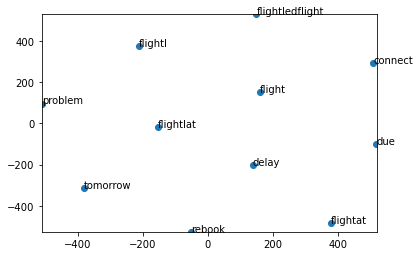

In [15]:
display_closestwords_tsnescatterplot(model,"flight", 100)

In [16]:
tokenizer = Tokenizer(num_words = 4000)
tokenizer.fit_on_texts(train_k["text"])
sequence = tokenizer.texts_to_sequences(train_k["text"])

In [17]:
max_seq_len = 1000
padded_seq = pad_sequences(sequence , maxlen = max_seq_len )

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(padded_seq,Y ,train_size = 0.80,random_state= 37)


In [19]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

11712
11712
2928
2928
(11712, 1000)
(11712, 3)
(2928, 1000)
(2928, 3)


In [20]:
index_of_words = tokenizer.word_index
print(len(index_of_words))

15768


In [21]:
embed_num_dims = 100

In [22]:
embedded_index['good']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.0624152 ,  0.19612542, -0.02536898, -0.64674675,  0.07495207,
        0.01705739,  0.24579678,  0.40977442, -0.42434502, -0.11665169,
       -0.0491672 , -0.19245176,  0.05996972, -0.03470567, -0.25658718,
       -0.3787313 , -0.7099877 , -0.14106926,  0.17790644,  0.22061685,
        0.12830023, -0.14300212, -0.07630431, -0.4004118 ,  0.6253541 ,
       -0.31778562,  0.2071261 , -0.37377298,  0.7019931 ,  0.4981348 ,
       -0.09663056, -0.31509817, -0.00841232, -0.28189427, -0.7746868 ,
        0.5076668 ,  0.47297132, -0.43320665, -0.32177114,  0.00004535,
       -0.03416877,  0.5268645 ,  0.3143107 , -0.19086328,  0.00872483,
       -0.14175957, -0.15314502, -0.0859631 ,  0.52471876, -0.58544064,
        0.24910344, -0.5911964 ,  0.3589867 ,  0.53538746,  0.18455556,
       -0.20037064, -0.42311338, -0.27876326, -0.23571701,  0.6589671 ,
       -0.0473044 ,  0.01932559,  0.19226104, -0.3286628 , -0.34699902,
        0.44740006, -0.1506336 , -0.23845786,  0.5186817 , -1.01

In [23]:
embedding_matrix = np.zeros((len(index_of_words) + 1, embed_num_dims))

tokens = []
labels = []

for word,i in index_of_words.items():
    temp = embedded_index["word"]
    if temp is not None:
        embedding_matrix[i] = temp
        
#for plotting
        tokens.append(embedding_matrix[i])
        labels.append(word)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


In [24]:
embedding_matrix.shape

(15769, 100)

In [25]:
embedd_layer = Embedding(len(index_of_words) + 1 , embed_num_dims , input_length = max_seq_len , weights = [embedding_matrix])

In [37]:
model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(60 , return_sequences = True , dropout = 0.2 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(9,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation = 'sigmoid'))

In [38]:
from keras.optimizers import Adam
add = Adam(learning_rate=0.01,
    beta_1=0.99,
    beta_2=0.998,
    epsilon=1e-06,
    amsgrad=False,)
model.compile(loss = 'categorical_crossentropy' , optimizer = add , metrics = ['accuracy'])

In [41]:
hist = model.fit(X_train,Y_train,epochs = 30, batch_size = 500, validation_data = (X_test,Y_test))

Train on 11712 samples, validate on 2928 samples
Epoch 1/30
11712/11712 [==============================] - 113s 10ms/step - loss: 0.1102 - accuracy: 0.9679 - val_loss: 1.8315 - val_accuracy: 0.7592
Epoch 3/30
11712/11712 [==============================] - 115s 10ms/step - loss: 0.1008 - accuracy: 0.9710 - val_loss: 1.8594 - val_accuracy: 0.7643
Epoch 4/30
11712/11712 [==============================] - 114s 10ms/step - loss: 0.1078 - accuracy: 0.9696 - val_loss: 1.7839 - val_accuracy: 0.7538
Epoch 5/30
11712/11712 [==============================] - 116s 10ms/step - loss: 0.1111 - accuracy: 0.9663 - val_loss: 1.7464 - val_accuracy: 0.7602
Epoch 6/30
11712/11712 [==============================] - 119s 10ms/step - loss: 0.1005 - accuracy: 0.9699 - val_loss: 1.8042 - val_accuracy: 0.7613
Epoch 7/30
11712/11712 [==============================] - 115s 10ms/step - loss: 0.1049 - accuracy: 0.9698 - val_loss: 1.7854 - val_accuracy: 0.7654
Epoch 8/30
11712/11712 [==============================] -